## Combined Analysis - Spectrum of Work Locations

This program creates a regression + clustering model to estimate the use of different third places for remote work based on demographic factors, then applies the model to the Chicago travel survey in order to compute aggregate travel measures before and after COVID-19.

January 2022

### Part 1) Regression Analysis

In [20]:
import pandas as pd
import random
# import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# import seaborn as sns
#random.seed(100)
import matplotlib.ticker as mtick
import multiprocessing as mp
import matplotlib.pyplot as plt
print("Number of processors: ", mp.cpu_count())

Number of processors:  4


In [21]:
# Import data
data_path='../Data/SWAA_data_Mar22.dta'
df = pd.read_stata(data_path, preserve_dtypes=False, convert_categoricals=False)

In [22]:
# Reformat data into explanatory and dependent variables 
df = df[(df['date'] > '2021-10-30') & (df['date'] < '2022-01-01')]
df_rand = df.sample(frac = 1, random_state = 1) # Shuffle order for training / testing set later

In [23]:
df['curr_flexible_work_pct'] = df['worktime_curr_home_pct'] + df['worktime_curr_faf_pct'] + df['worktime_curr_cowork_pct'] + df['worktime_curr_public_pct']
df['des_flexible_work_pct'] = df['worktime_des_home_pct'] + df['worktime_des_faf_pct'] + df['worktime_des_cowork_pct'] + df['worktime_des_public_pct']
df['plan_flexible_work_pct'] = df['worktime_plan_home_pct'] + df['worktime_plan_faf_pct'] + df['worktime_plan_cowork_pct'] + df['worktime_plan_public_pct']

In [24]:
df['curr_third_place_work_pct'] = df['worktime_curr_faf_pct'] + df['worktime_curr_cowork_pct'] + df['worktime_curr_public_pct']
df['des_third_place_work_pct'] = df['worktime_des_faf_pct'] + df['worktime_des_cowork_pct'] + df['worktime_des_public_pct']
df['plan_third_place_work_pct'] = df['worktime_plan_faf_pct'] + df['worktime_plan_cowork_pct'] + df['worktime_plan_public_pct']

In [25]:
aggre_income_df = df[['income', 'curr_flexible_work_pct', 'des_flexible_work_pct', 'plan_flexible_work_pct']].groupby(by='income', as_index=False).mean()

NameError: name 'sns' is not defined

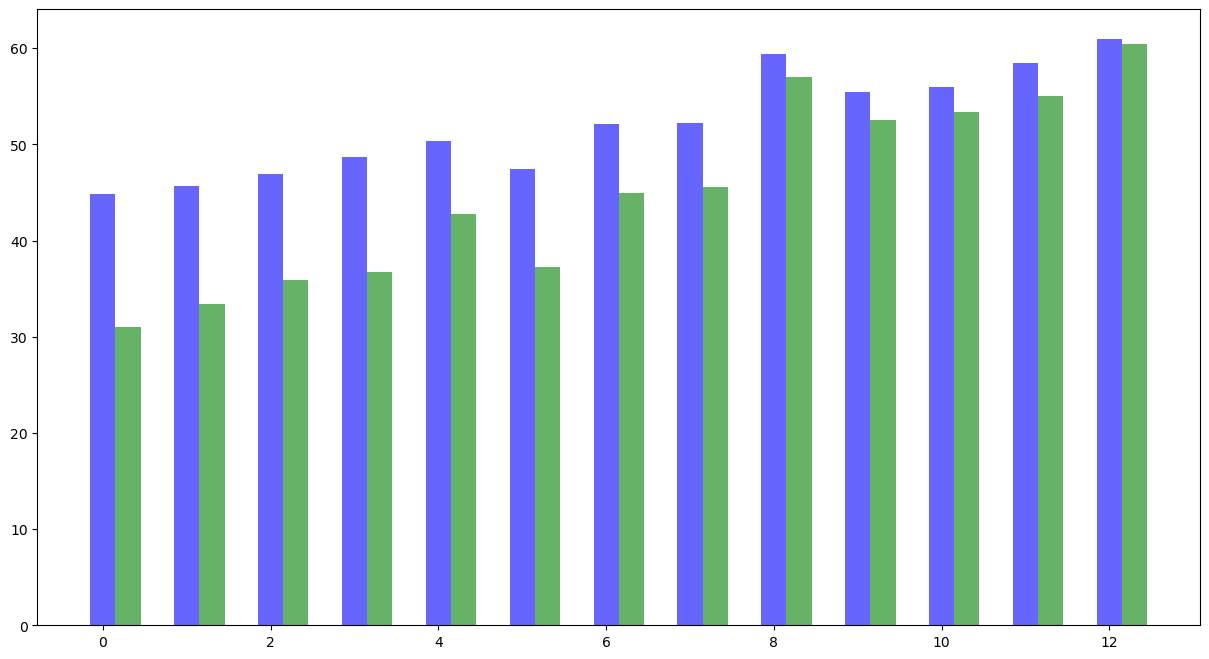

In [26]:
fig1, ax1 = plt.subplots(figsize=(15, 8))

barWidth = 0.3

bars = ('<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-100','100-125', '125-150', '150-200','200-250','250+')
r1 = np.arange(len(bars))
r2 = [x + barWidth for x in r1]

plt.bar(r1, aggre_income_df.des_flexible_work_pct, width = barWidth, color='blue', alpha=0.6, label='Employee Preferences')
plt.bar(r2, aggre_income_df.plan_flexible_work_pct, width = barWidth, color='green', alpha=0.6, label='Employer Plans')

sns.regplot(x=r1, y=aggre_income_df.des_flexible_work_pct, ax=ax1, color='blue')
sns.regplot(x=r2, y=aggre_income_df.plan_flexible_work_pct, ax=ax1, color='green')

plt.xticks(x_pos, bars, color='black')
plt.yticks(color='black')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel("Percentage of Total Work Hours", fontstyle='oblique', fontsize=20)
plt.xlabel("2019 Income ($USD in Thousands)", fontstyle='oblique', fontsize=20)

plt.ylim(0, 70)

plt.legend(loc=2, prop={'size': 20})

plt.title("Flexible Work by Income", fontsize=25)

plt.savefig("flexible_work_by_income.png", dpi=200)

plt.show()

In [ ]:
fig1, ax1 = plt.subplots(figsize=(15, 8))

barWidth = 0.3

bars = ('<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-100','100-125', '125-150', '150-200','200-250','250+')
r1 = np.arange(len(bars))

plt.bar(r1, aggre_income_df.curr_flexible_work_pct, width = barWidth, color='orange', alpha=0.6, label='Current Work Hour Allocation')

sns.regplot(x=r1, y=aggre_income_df.curr_flexible_work_pct, ax=ax1, color='orange')

plt.xticks(x_pos, bars, color='black')
plt.yticks(color='black')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel("Percentage of Total Work Hours", fontstyle='oblique', fontsize=20)
plt.xlabel("2019 Income ($USD in Thousands)", fontstyle='oblique', fontsize=20)

plt.ylim(0, 70)

plt.legend(loc=2, prop={'size': 20})

plt.title("Flexible Work by Income", fontsize=25)

plt.savefig("current_flexible_work_by_income.png", dpi=200)

plt.show()

In [ ]:
#df[['wfhcovid_fracmat', 'wfhcovid_frac', 'worktime_curr_home_pct', 'curr_flexible_work_pct']].corr()

In [ ]:
#df[['des_flexible_work_pct', 'worktime_des_home_pct', 'numwfh_days_postCOVID_s_u']].corr()

In [ ]:
#df[['plan_flexible_work_pct', 'worktime_plan_home_pct', 'numwfh_days_postCOVID_boss_s_u']].corr()

Using percentage of time questions, current working days is approximated better compared to desired and employer planned numbers. remote hours and remote working days are quite different.

In [27]:
df[['worktime_remoteable_pct', 'curr_flexible_work_pct', 'des_flexible_work_pct', 'plan_flexible_work_pct']].describe()

,worktime_remoteable_pct,curr_flexible_work_pct,des_flexible_work_pct,plan_flexible_work_pct
count,7843.000000,7843.000000,8729.000000,8729.000000
mean,51.483106,50.904118,51.675335,44.211823
std,35.507280,35.763633,36.014090,37.343022
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,10.000000,10.000000,0.000000
50%,50.000000,60.000000,60.000000,50.000000
75%,85.000000,79.000000,80.000000,70.000000
max,100.000000,100.000000,100.000000,100.000000


<Axes: >

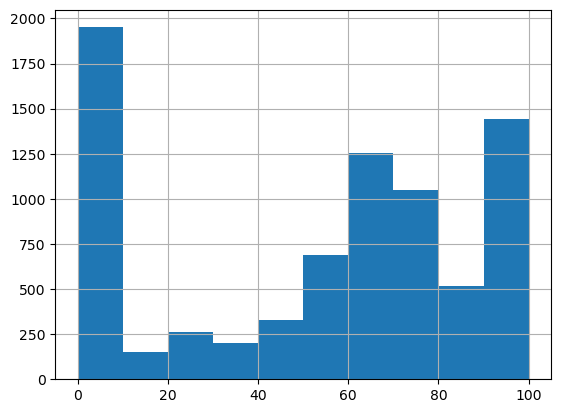

In [28]:
df.curr_flexible_work_pct.hist()

In [29]:
# Dependent variables:
#dep_colnames = ['numwfh_days_postCOVID_s_u', 'numwfh_days_postCOVID_boss_s_u', 'wfhcovid_fracmat']
dep_colnames = ['curr_flexible_work_pct', 'des_flexible_work_pct', 'plan_flexible_work_pct']

# Explanatory variables:
# Age, Occupation, Industry, Income, Education, Race, Gender, Home Location Density
# Other options: commute mode, has children, hours worked per week
exp_colnames = ['age_quant', 'occupation', 'work_industry', 'income', 'educ_years', 'race_ethnicity', 'female', 'logpop_den_current']

df_filtered = df.filter(dep_colnames + exp_colnames)
df_filtered = df_filtered.dropna(how = 'any')

df_filtered = df_filtered[df_filtered.income != 1000]

df_dep = df_filtered.filter(dep_colnames) 
exp_colnames.remove('logpop_den_current')
df_exp = df_filtered.filter(exp_colnames)

# Convert categorical variables to dummy: occupation, industry, race, gender. Drop first category to avoid colinearity
df_exp['female'] = df_exp['female'] / 100
df_exp = pd.get_dummies(df_exp, drop_first=True, columns=['occupation','work_industry','race_ethnicity'])

In [30]:
# Urban: 3000+ person per square mile
# Suburban: 1000 - 3000 person per square mile
# Rural: less than 1000 person per square mile
t2 = np.log(3000)
t1 = np.log(1000)
living_area_list = []
for i in df_filtered.logpop_den_current.values.tolist():
    if pd.isnull(i):
        living_area_list.append(np.nan)
        continue
    if i <= t1:
        living_area_list.append("rural")
    elif i <= t2:
        living_area_list.append("suburban")
    else:
        living_area_list.append("urban")
df_exp['living_area'] = living_area_list
df_exp = pd.get_dummies(df_exp, drop_first=True, columns=['living_area'])

In [32]:
len(df_exp)

7205

In [31]:
# Run Linear Regression with Statsmodels
def lin_reg_sm(df_dep, df_exp):
    mod = sm.OLS(df_dep, df_exp)
    fit = mod.fit()
    print(fit.summary())
    qqfig = sm.qqplot(fit.resid, line='r') # Plot residuals
    return fit.params, fit

# curr_coef, curr_model = lin_reg_sm(df_dep['wfhcovid_fracmat'], df_exp)
# pref_coef, pref_model = lin_reg_sm(df_dep['numwfh_days_postCOVID_s_u'], df_exp)
# boss_coef, boss_model = lin_reg_sm(df_dep['numwfh_days_postCOVID_boss_s_u'], df_exp)
curr_coef, curr_model = lin_reg_sm(df_dep['curr_flexible_work_pct'], df_exp)
pref_coef, pref_model = lin_reg_sm(df_dep['des_flexible_work_pct'], df_exp)
boss_coef, boss_model = lin_reg_sm(df_dep['plan_flexible_work_pct'], df_exp)

NameError: name 'sm' is not defined

In [90]:
df_exp.head()

,age_quant,income,educ_years,female,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_7.0,...,work_industry_16.0,work_industry_17.0,work_industry_18.0,race_ethnicity_2.0,race_ethnicity_4.0,race_ethnicity_5.0,race_ethnicity_6.0,race_ethnicity_7.0,living_area_suburban,living_area_urban
2,35.0,25.0,16.0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
23,45.0,175.0,16.0,0.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
33,35.0,175.0,18.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
40,35.0,25.0,16.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
48,25.0,55.0,14.0,0.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


#### Simplified Regression

In [91]:
# Dependent variables:
#dep_colnames = ['numwfh_days_postCOVID_s_u', 'numwfh_days_postCOVID_boss_s_u', 'wfhcovid_fracmat']
dep_colnames = ['curr_flexible_work_pct', 'des_flexible_work_pct', 'plan_flexible_work_pct']

# Explanatory variables:
# Age, Occupation, Industry, Income, Education, Race, Gender, Home Location Density
# Other options: commute mode, has children, hours worked per week
simplified_exp_colnames = ['age_quant', 'income', 'educ_years', 'female', 'logpop_den_current']

df_filtered_simplified = df.filter(dep_colnames + simplified_exp_colnames)
df_filtered_simplified = df_filtered_simplified.dropna(how = 'any')

df_filtered_simplified = df_filtered_simplified[df_filtered_simplified.income != 1000]

df_dep_simplified = df_filtered_simplified.filter(dep_colnames) 
simplified_exp_colnames.remove('logpop_den_current')
df_exp_simplified = df_filtered_simplified.filter(simplified_exp_colnames)

# Convert categorical variables to dummy: occupation, industry, race, gender. Drop first category to avoid colinearity
df_exp_simplified['female'] = df_exp_simplified['female'] / 100

In [92]:
# Urban: 3000+ person per square mile
# Suburban: 1000 - 3000 person per square mile
# Rural: less than 1000 person per square mile
t2 = np.log(3000)
t1 = np.log(1000)
living_area_list = []
for i in df_filtered_simplified.logpop_den_current.values.tolist():
    if pd.isnull(i):
        living_area_list.append(np.nan)
        continue
    if i <= t1:
        living_area_list.append("rural")
    elif i <= t2:
        living_area_list.append("suburban")
    else:
        living_area_list.append("urban")
df_exp_simplified['living_area'] = living_area_list
df_exp_simplified = pd.get_dummies(df_exp_simplified, drop_first=True, columns=['living_area'])

                                   OLS Regression Results                                  
Dep. Variable:     curr_flexible_work_pct   R-squared (uncentered):                   0.672
Model:                                OLS   Adj. R-squared (uncentered):              0.672
Method:                     Least Squares   F-statistic:                              2465.
Date:                    Mon, 16 Jan 2023   Prob (F-statistic):                        0.00
Time:                            15:59:28   Log-Likelihood:                         -35994.
No. Observations:                    7218   AIC:                                  7.200e+04
Df Residuals:                        7212   BIC:                                  7.204e+04
Df Model:                               6                                                  
Covariance Type:                nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025    

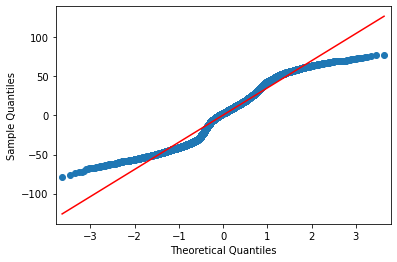

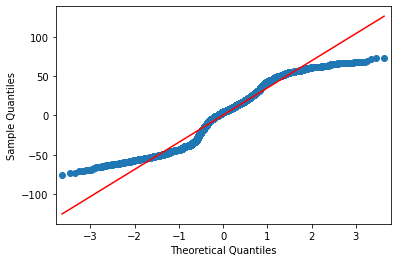

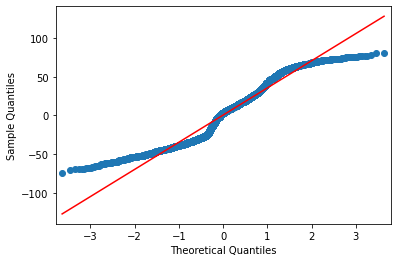

In [93]:
curr_coef, curr_model = lin_reg_sm(df_filtered_simplified['curr_flexible_work_pct'], df_exp_simplified)
pref_coef, pref_model = lin_reg_sm(df_filtered_simplified['des_flexible_work_pct'], df_exp_simplified)
boss_coef, boss_model = lin_reg_sm(df_filtered_simplified['plan_flexible_work_pct'], df_exp_simplified)

In [94]:
pref_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     des_flexible_work_pct   R-squared (uncentered):                   0.680
Model:                               OLS   Adj. R-squared (uncentered):              0.680
Method:                    Least Squares   F-statistic:                              2556.
Date:                   Mon, 16 Jan 2023   Prob (F-statistic):                        0.00
Time:                           15:59:29   Log-Likelihood:                         -35953.
No. Observations:                   7218   AIC:                                  7.192e+04
Df Residuals:                       7212   BIC:                                  7.196e+04
Df Model:                              6                                                  
Covariance Type:               nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
age_quant               -0.0586      0.037     -1.574      0.115      -0.132       0.014
income                   0.0271      0.009      2.963      0.003       0.009       0.045
educ_years               2.9222      0.125     23.431      0.000       2.678       3.167
female                   4.3572      0.876      4.976      0.000       2.641       6.074
living_area_suburban     4.5491      1.134      4.012      0.000       2.326       6.772
living_area_urban        6.7185      1.007      6.671      0.000       4.744       8.693
==============================================================================
Omnibus:                     2517.313   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.708
Skew:                          -0.030   Prob(JB):                     1.90e-76
Kurtosis:                       1.925   Cond. No.                         342.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Regression with third place percentage

In [95]:
# Dependent variables:
#dep_colnames = ['numwfh_days_postCOVID_s_u', 'numwfh_days_postCOVID_boss_s_u', 'wfhcovid_fracmat']
dep_colnames = ['curr_third_place_work_pct', 'des_third_place_work_pct', 'plan_third_place_work_pct']

# Explanatory variables:
# Age, Occupation, Industry, Income, Education, Race, Gender, Home Location Density
# Other options: commute mode, has children, hours worked per week
simplified_exp_colnames = ['age_quant', 'income', 'educ_years', 'female', 'logpop_den_current']

df_filtered_simplified = df.filter(dep_colnames + simplified_exp_colnames)
df_filtered_simplified = df_filtered_simplified.dropna(how = 'any')

df_filtered_simplified = df_filtered_simplified[df_filtered_simplified.income != 1000]

df_dep_simplified = df_filtered_simplified.filter(dep_colnames) 
simplified_exp_colnames.remove('logpop_den_current')
df_exp_simplified = df_filtered_simplified.filter(simplified_exp_colnames)

# Convert categorical variables to dummy: occupation, industry, race, gender. Drop first category to avoid colinearity
df_exp_simplified['female'] = df_exp_simplified['female'] / 100

In [96]:
# Urban: 3000+ person per square mile
# Suburban: 1000 - 3000 person per square mile
# Rural: less than 1000 person per square mile
t2 = np.log(3000)
t1 = np.log(1000)
living_area_list = []
for i in df_filtered_simplified.logpop_den_current.values.tolist():
    if pd.isnull(i):
        living_area_list.append(np.nan)
        continue
    if i <= t1:
        living_area_list.append("rural")
    elif i <= t2:
        living_area_list.append("suburban")
    else:
        living_area_list.append("urban")
df_exp_simplified['living_area'] = living_area_list
df_exp_simplified = pd.get_dummies(df_exp_simplified, drop_first=True, columns=['living_area'])

                                    OLS Regression Results                                    
Dep. Variable:     curr_third_place_work_pct   R-squared (uncentered):                   0.481
Model:                                   OLS   Adj. R-squared (uncentered):              0.480
Method:                        Least Squares   F-statistic:                              1114.
Date:                       Mon, 16 Jan 2023   Prob (F-statistic):                        0.00
Time:                               15:59:34   Log-Likelihood:                         -33093.
No. Observations:                       7218   AIC:                                  6.620e+04
Df Residuals:                           7212   BIC:                                  6.624e+04
Df Model:                                  6                                                  
Covariance Type:                   nonrobust                                                  
                           coef    std err        

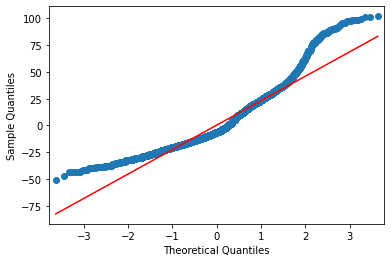

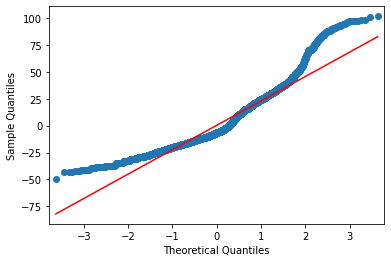

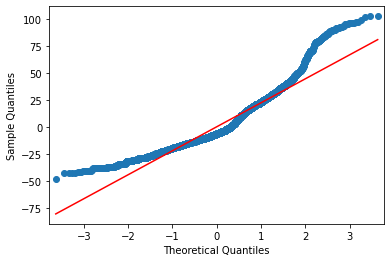

In [97]:
curr_coef, curr_model = lin_reg_sm(df_filtered_simplified['curr_third_place_work_pct'], df_exp_simplified)
pref_coef, pref_model = lin_reg_sm(df_filtered_simplified['des_third_place_work_pct'], df_exp_simplified)
boss_coef, boss_model = lin_reg_sm(df_filtered_simplified['plan_third_place_work_pct'], df_exp_simplified)

In [98]:
pref_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     des_third_place_work_pct   R-squared (uncentered):                   0.471
Model:                                  OLS   Adj. R-squared (uncentered):              0.471
Method:                       Least Squares   F-statistic:                              1071.
Date:                      Mon, 16 Jan 2023   Prob (F-statistic):                        0.00
Time:                              15:59:36   Log-Likelihood:                         -33046.
No. Observations:                      7218   AIC:                                  6.610e+04
Df Residuals:                          7212   BIC:                                  6.615e+04
Df Model:                                 6                                                  
Covariance Type:                  nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
age_quant               -0.3202      0.025    -12.875      0.000      -0.369      -0.271
income                   0.0787      0.006     12.860      0.000       0.067       0.091
educ_years               1.5906      0.083     19.078      0.000       1.427       1.754
female                  -4.3149      0.585     -7.371      0.000      -5.462      -3.167
living_area_suburban     1.5027      0.758      1.982      0.047       0.017       2.989
living_area_urban        6.3704      0.673      9.462      0.000       5.051       7.690
==============================================================================
Omnibus:                     1290.244   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2298.634
Skew:                           1.140   Prob(JB):                         0.00
Kurtosis:                       4.564   Cond. No.                         342.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Income Investigation

In [99]:
# Dependent variables:
#dep_colnames = ['numwfh_days_postCOVID_s_u', 'numwfh_days_postCOVID_boss_s_u', 'wfhcovid_fracmat']
dep_colnames = ['curr_flexible_work_pct', 'des_flexible_work_pct', 'plan_flexible_work_pct']

# Explanatory variables:
# Age, Occupation, Industry, Income, Education, Race, Gender, Home Location Density
# Other options: commute mode, has children, hours worked per week
simplified_exp_colnames = ['income']

df_filtered_simplified = df.filter(dep_colnames + simplified_exp_colnames)
df_filtered_simplified = df_filtered_simplified.dropna(how = 'any')

df_filtered_simplified = df_filtered_simplified[df_filtered_simplified.income != 1000]

df_dep_simplified = df_filtered_simplified.filter(dep_colnames) 
df_exp_simplified = df_filtered_simplified.filter(simplified_exp_colnames)

                                   OLS Regression Results                                  
Dep. Variable:     curr_flexible_work_pct   R-squared (uncentered):                   0.556
Model:                                OLS   Adj. R-squared (uncentered):              0.556
Method:                     Least Squares   F-statistic:                              9553.
Date:                    Mon, 16 Jan 2023   Prob (F-statistic):                        0.00
Time:                            15:59:38   Log-Likelihood:                         -39240.
No. Observations:                    7632   AIC:                                  7.848e+04
Df Residuals:                        7631   BIC:                                  7.849e+04
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

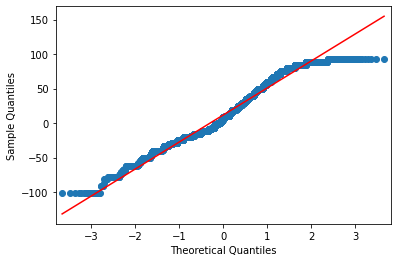

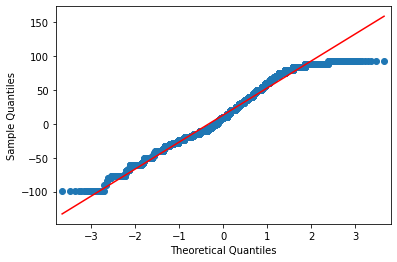

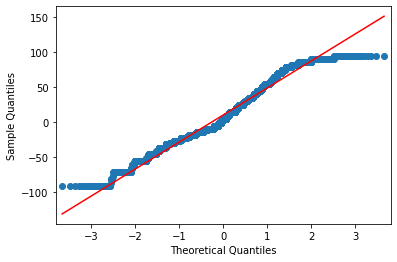

In [100]:
curr_coef, curr_model = lin_reg_sm(df_filtered_simplified['curr_flexible_work_pct'], df_exp_simplified)
pref_coef, pref_model = lin_reg_sm(df_filtered_simplified['des_flexible_work_pct'], df_exp_simplified)
boss_coef, boss_model = lin_reg_sm(df_filtered_simplified['plan_flexible_work_pct'], df_exp_simplified)

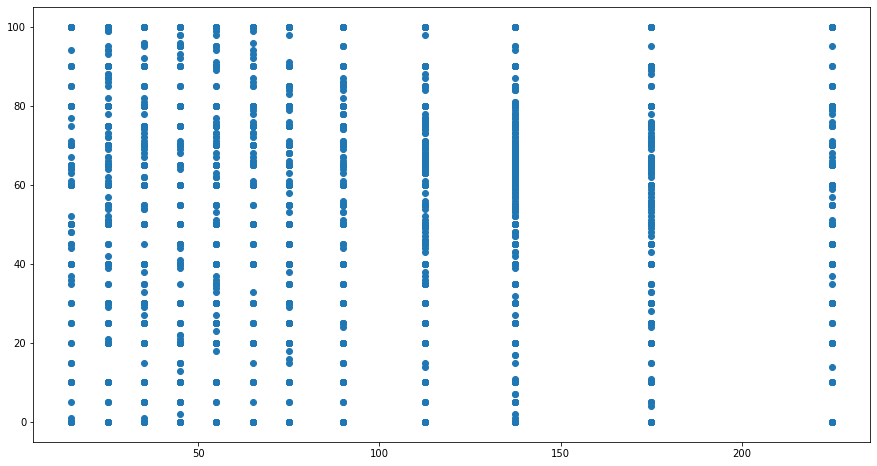

In [101]:
fig1, ax1 = plt.subplots(figsize=(15, 8))

plt.scatter(df_filtered_simplified.income, df_filtered_simplified.curr_flexible_work_pct)

In [102]:
df_filtered_simplified[df_filtered_simplified.income == 1000]

,curr_flexible_work_pct,des_flexible_work_pct,plan_flexible_work_pct,income


In [103]:
df_filtered_simplified.income.unique()

array([ 25. , 137.5,  35. , 175. ,  55. ,  15. ,  45. , 225. ,  75. ,
        90. ,  65. , 112.5])

In [104]:
df[['income', 'income_cat']][df.income == 1000].shape

(213, 2)

Alternative method: Sklearn (not used)

In [105]:
# # Note that r^2 is much different due to different methodology between StatsModels and Sklearn (sklearn.score assumes intercept)
# reg = linear_model.LinearRegression()
# reg.fit(df_exp, df_dep) 
# coefs = pd.DataFrame(columns = df_exp.columns)
# coefs.loc[0] = reg.coef_
# print("Coefficients: \n", coefs.T)
# print("R^2: ", reg.score(df_exp, df_dep))

# # Train/Test for Evaluation (Sklearn only)
# midpoint = int(len(df_exp) / 2)
# x_train = df_exp[:midpoint]
# y_train = df_dep[:midpoint]
# x_test = df_exp[midpoint:]
# y_test = df_dep[midpoint:]
# reg_train = linear_model.LinearRegression()
# reg_train.fit(x_train, y_train) 

# y_pred = reg.predict(x_test)
# print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

### Part 2: Clustering Analysis

In [106]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

### Load Data

In [107]:
# Import data
data_path='../Data/SWAA_data_Mar22.dta'
df = pd.read_stata(data_path, preserve_dtypes=False, convert_categoricals=False)
df = df[(df['date'] > '2021-10-30')]

In [108]:
df = df.dropna(axis=1, how='all')
df.head()

,agebin,education,incomebin,gender,iincomebin,zipcode_job_current,zipcode_live_current,workstatus_current_new,workstatus_monday,workstatus_tuesday,...,wfh_days_postCOVID_ss,wfh_days_postCOVID_boss_ss,wfh_ownroom_notbed,wfh_feel_pr_hyb_quant0,cratio100_nw,icratio100_nw,cratio100,icratio100,numwfh_days_postCOVID_boss_s_u_l,wfhcovid_fracmat_all
2,3.0,4.0,$20k to $50k,2.0,1.0,99505.0,99505.0,1.0,2.0,2.0,...,4.0,3.0,0.0,40.0,0.001926,0.000853,0.001984,0.000865,40.000000,28.571428
5,4.0,4.0,$100k to $150k,2.0,3.0,99613.0,99613.0,1.0,3.0,3.0,...,6.0,6.0,0.0,30.0,0.000570,0.001387,0.000587,0.001407,100.000000,28.571428
8,4.0,4.0,$100k to $150k,2.0,3.0,99613.0,99613.0,1.0,3.0,3.0,...,6.0,6.0,0.0,30.0,0.000570,0.001387,0.000587,0.001407,100.000000,0.000000
12,4.0,4.0,$100k to $150k,2.0,3.0,99613.0,99613.0,1.0,3.0,3.0,...,3.0,4.0,0.0,20.0,0.000485,0.001182,0.000500,0.001199,60.000004,0.000000
18,2.0,2.0,$20k to $50k,2.0,1.0,99687.0,99687.0,1.0,1.0,2.0,...,5.0,6.0,0.0,7.5,0.002528,0.001568,0.002604,0.001589,100.000000,60.000000


In [109]:
df.shape

(24306, 263)

### Data Processing

In [110]:
df['weight'] = df['cratio100'] * 100 / sum(df['cratio100'])

In [111]:
df.columns.tolist()

['agebin',
 'education',
 'incomebin',
 'gender',
 'iincomebin',
 'zipcode_job_current',
 'zipcode_live_current',
 'workstatus_current_new',
 'workstatus_monday',
 'workstatus_tuesday',
 'workstatus_wednesday',
 'workstatus_thursday',
 'workstatus_friday',
 'workstatus_saturday',
 'workstatus_sunday',
 'furloughed_searching',
 'infection_labsearch_avoid',
 'infection_labsearch_highpay',
 'infection_labsearch_benefits',
 'infection_labsearch_wfhpref',
 'infection_labsearch_no',
 'labsearch_qual',
 'infection_lfp',
 'wfh_lfp',
 'self_employment',
 'ownbusiness_sizecat',
 'employer_sizecat',
 'wfhcovid_ever',
 'who_sets_wfhsched',
 'factors_wfhsched_cow',
 'factors_wfhsched_spouse',
 'factors_wfhsched_client',
 'factors_wfhsched_traffic',
 'common_varying_sched',
 'coworkers_samedays_pref',
 'wfh_handle_chores',
 'cities_attn',
 'workhours_preCOVID',
 'commutetime_towork',
 'commutetime_fromwork',
 'groomtime_commute',
 'groomtime_wfh',
 'drivealone_preCOVID_pct',
 'carpool_preCOVID_pct',

In [112]:
df = df[df[['worktime_curr_home_pct',
 'worktime_curr_ebp_pct',
 'worktime_curr_client_pct',
 'worktime_curr_faf_pct',
 'worktime_curr_cowork_pct',
 'worktime_curr_public_pct']].sum(axis=1) == 100]

In [113]:
df['curr_flexible_work_pct'] = df.worktime_curr_home_pct \
    + df.worktime_curr_faf_pct + df.worktime_curr_cowork_pct \
    + df.worktime_curr_public_pct

df['des_flexible_work_pct'] = df.worktime_des_home_pct \
    + df.worktime_des_faf_pct + df.worktime_des_cowork_pct \
    + df.worktime_des_public_pct

df['plan_flexible_work_pct'] = df.worktime_plan_home_pct \
    + df.worktime_plan_faf_pct + df.worktime_plan_cowork_pct \
    + df.worktime_plan_public_pct

In [114]:
df = df[df['curr_flexible_work_pct'] != 0]
#df = df[df['des_flexible_work_pct'] != 0]
#df = df[df['plan_flexible_work_pct'] != 0]

In [115]:
df.shape

(15264, 267)

In [116]:
df['curr_home_pct_relative'] = round((df.worktime_curr_home_pct / df.curr_flexible_work_pct) * 100, 2)
df['curr_faf_pct_relative'] = round((df.worktime_curr_faf_pct / df.curr_flexible_work_pct) * 100, 2)
df['curr_cowork_pct_relative'] = round((df.worktime_curr_cowork_pct / df.curr_flexible_work_pct) * 100, 2)
df['curr_public_pct_relative'] = round((df.worktime_curr_public_pct / df.curr_flexible_work_pct) * 100, 2)

df['des_home_pct_relative'] = round((df.worktime_des_home_pct / df.des_flexible_work_pct) * 100, 2)
df['des_faf_pct_relative'] = round((df.worktime_des_faf_pct / df.des_flexible_work_pct) * 100, 2)
df['des_cowork_pct_relative'] = round((df.worktime_des_cowork_pct / df.des_flexible_work_pct) * 100, 2)
df['des_public_pct_relative'] = round((df.worktime_des_public_pct / df.des_flexible_work_pct) * 100, 2)

df['plan_home_pct_relative'] = round((df.worktime_plan_home_pct / df.plan_flexible_work_pct) * 100, 2)
df['plan_faf_pct_relative'] = round((df.worktime_plan_faf_pct / df.plan_flexible_work_pct) * 100, 2)
df['plan_cowork_pct_relative'] = round((df.worktime_plan_cowork_pct / df.plan_flexible_work_pct) * 100, 2)
df['plan_public_pct_relative'] = round((df.worktime_plan_public_pct / df.plan_flexible_work_pct) * 100, 2)

In [117]:
# Urban: 3000+ person per square mile
# Suburban: 1000 - 3000 person per square mile
# Rural: less than 1000 person per square mile
t2 = np.log(3000)
t1 = np.log(1000)
living_area_list = []
for i in df.logpop_den_current.values.tolist():
    if pd.isnull(i):
        living_area_list.append(np.nan)
        continue
    if i <= t1:
        living_area_list.append("rural")
    elif i <= t2:
        living_area_list.append("suburban")
    else:
        living_area_list.append("urban")

In [118]:
df['living_area'] = living_area_list

### Clustering 

In [119]:
df[['curr_home_pct_relative', 'curr_faf_pct_relative', 'curr_cowork_pct_relative', 'curr_public_pct_relative',
    'des_home_pct_relative', 'des_faf_pct_relative', 'des_cowork_pct_relative', 'des_public_pct_relative', 
    'plan_home_pct_relative', 'plan_faf_pct_relative', 'plan_cowork_pct_relative', 'plan_public_pct_relative']].head()

,curr_home_pct_relative,curr_faf_pct_relative,curr_cowork_pct_relative,curr_public_pct_relative,des_home_pct_relative,des_faf_pct_relative,des_cowork_pct_relative,des_public_pct_relative,plan_home_pct_relative,plan_faf_pct_relative,plan_cowork_pct_relative,plan_public_pct_relative
2,36.36,9.09,18.18,36.36,25.00,31.25,18.75,25.00,33.33,16.67,16.67,33.33
5,33.33,33.33,16.67,16.67,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00
8,28.57,14.29,28.57,28.57,33.33,33.33,16.67,16.67,14.29,28.57,28.57,28.57
12,28.57,14.29,28.57,28.57,28.57,28.57,28.57,14.29,28.57,28.57,14.29,28.57
18,5.56,33.33,5.56,55.56,3.45,8.62,79.31,8.62,NaN,NaN,NaN,NaN


In [120]:
exp_colnames = ['age', 'occupation','work_industry', 'iincomebin', 'education', 'race_ethnicity', 'female', 'living_area']
df_exp = df.filter(exp_colnames)

In [121]:
df_exp = df_exp.dropna(how='any')

In [122]:
df_exp.head()

,occupation,work_industry,iincomebin,education,race_ethnicity,female,living_area
2,5.0,8.0,1.0,4.0,1.0,0.0,rural
30,10.0,8.0,4.0,5.0,1.0,0.0,suburban
32,5.0,6.0,4.0,6.0,1.0,0.0,suburban
33,8.0,6.0,4.0,5.0,1.0,0.0,suburban
40,1.0,1.0,1.0,4.0,6.0,0.0,suburban


In [123]:
df_occupation = pd.get_dummies(df_exp.occupation, prefix='occupation')

In [124]:
df_work_industry = pd.get_dummies(df_exp.work_industry, prefix='work_industry')

In [125]:
df_education = pd.get_dummies(df_exp.education, prefix='education')

In [126]:
df_race = pd.get_dummies(df_exp.race_ethnicity, prefix='race')

In [127]:
df_income = pd.get_dummies(df_exp.iincomebin, prefix='income')

In [128]:
df_living_area = pd.get_dummies(df_exp.living_area, prefix='living_area')

In [129]:
combined_df = pd.concat([df_occupation, df_work_industry, df_education, df_race, df_income, df_living_area], axis=1)

In [130]:
combined_df.head()

,occupation_1.0,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_7.0,occupation_8.0,occupation_9.0,occupation_10.0,...,race_6.0,race_7.0,income_0.0,income_1.0,income_2.0,income_3.0,income_4.0,living_area_rural,living_area_suburban,living_area_urban
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
30,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
32,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
33,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
40,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [131]:
# Data normalization
min_max_scaler = preprocessing.MinMaxScaler()

In [132]:
x_scaled = min_max_scaler.fit_transform(combined_df.values)

In [133]:
normalized_df = pd.DataFrame(x_scaled, columns=combined_df.columns)

In [134]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [135]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(normalized_df)
    score = silhouette_score(normalized_df, kmeans.labels_)
    silhouette_coefficients.append(score)

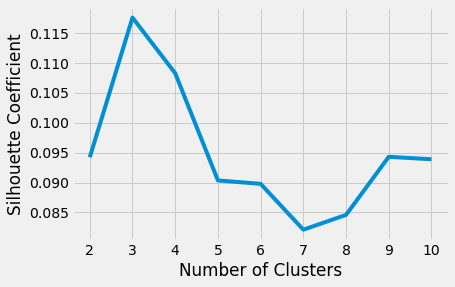

In [136]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [137]:
k = 3
kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
kmeans.fit(normalized_df)
clustering_labels = kmeans.labels_

### Analyze Clusters

In [138]:
combined_df['labels'] = clustering_labels

In [139]:
df1 = pd.DataFrame(combined_df[combined_df.labels == 0].mean(), columns=['cluster_1_mean'])
df2 = pd.DataFrame(combined_df[combined_df.labels == 1].mean(), columns=['cluster_2_mean'])
df3 = pd.DataFrame(combined_df[combined_df.labels == 2].mean(), columns=['cluster_3_mean'])
df4 = pd.DataFrame(combined_df[combined_df.labels == 3].mean(), columns=['cluster_4_mean'])
df5 = pd.DataFrame(combined_df[combined_df.labels == 4].mean(), columns=['cluster_5_mean'])
df6 = pd.DataFrame(combined_df[combined_df.labels == 5].mean(), columns=['cluster_6_mean'])
df7 = pd.DataFrame(combined_df[combined_df.labels == 6].mean(), columns=['cluster_7_mean'])

In [140]:
df_mean_clusters = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=1)

In [141]:
df_mean_clusters

,cluster_1_mean,cluster_2_mean,cluster_3_mean,cluster_4_mean,cluster_5_mean,cluster_6_mean,cluster_7_mean
occupation_1.0,0.014916,0.008611,0.018370,NaN,NaN,NaN,NaN
occupation_2.0,0.051095,0.045321,0.105481,NaN,NaN,NaN,NaN
occupation_3.0,0.014599,0.019941,0.015111,NaN,NaN,NaN,NaN
occupation_4.0,0.030149,0.029685,0.034370,NaN,NaN,NaN,NaN
occupation_5.0,0.195176,0.153410,0.252444,NaN,NaN,NaN,NaN
occupation_6.0,0.123136,0.115794,0.105630,NaN,NaN,NaN,NaN
occupation_7.0,0.058712,0.066621,0.045185,NaN,NaN,NaN,NaN
occupation_8.0,0.117106,0.101065,0.116889,NaN,NaN,NaN,NaN
occupation_9.0,0.098064,0.125085,0.064296,NaN,NaN,NaN,NaN
occupation_10.0,0.108854,0.114208,0.078370,NaN,NaN,NaN,NaN


In [142]:
target_df = df[['curr_home_pct_relative', 'curr_faf_pct_relative', 'curr_cowork_pct_relative', 'curr_public_pct_relative',
    'des_home_pct_relative', 'des_faf_pct_relative', 'des_cowork_pct_relative', 'des_public_pct_relative', 
    'plan_home_pct_relative', 'plan_faf_pct_relative', 'plan_cowork_pct_relative', 'plan_public_pct_relative']].loc[combined_df.index]

In [143]:
target_df['labels'] = clustering_labels

In [144]:
df1_target = pd.DataFrame(target_df[target_df.labels == 0].mean(), columns=['cluster_1_mean'])
df2_target = pd.DataFrame(target_df[target_df.labels == 1].mean(), columns=['cluster_2_mean'])
df3_target = pd.DataFrame(target_df[target_df.labels == 2].mean(), columns=['cluster_3_mean'])
df4_target = pd.DataFrame(target_df[target_df.labels == 3].mean(), columns=['cluster_4_mean'])
df5_target = pd.DataFrame(target_df[target_df.labels == 4].mean(), columns=['cluster_5_mean'])
df6_target = pd.DataFrame(target_df[target_df.labels == 5].mean(), columns=['cluster_6_mean'])
df7_target = pd.DataFrame(target_df[target_df.labels == 6].mean(), columns=['cluster_7_mean'])

In [145]:
df_mean_target = pd.concat([df1_target, df2_target, df3_target, df4_target, df5_target, df6_target, df7_target], axis=1)

In [146]:
df_mean_target

,cluster_1_mean,cluster_2_mean,cluster_3_mean,cluster_4_mean,cluster_5_mean,cluster_6_mean,cluster_7_mean
curr_home_pct_relative,63.776750,66.124960,50.957711,NaN,NaN,NaN,NaN
curr_faf_pct_relative,11.522596,10.812180,15.845504,NaN,NaN,NaN,NaN
curr_cowork_pct_relative,12.725516,12.334815,17.544619,NaN,NaN,NaN,NaN
curr_public_pct_relative,11.975008,10.728049,15.652203,NaN,NaN,NaN,NaN
des_home_pct_relative,59.563462,63.956302,49.619977,NaN,NaN,NaN,NaN
des_faf_pct_relative,12.939541,12.215098,17.217142,NaN,NaN,NaN,NaN
des_cowork_pct_relative,14.283664,12.171211,17.555784,NaN,NaN,NaN,NaN
des_public_pct_relative,13.213297,11.657244,15.607249,NaN,NaN,NaN,NaN
plan_home_pct_relative,60.153746,64.162033,48.873199,NaN,NaN,NaN,NaN
plan_faf_pct_relative,12.775278,11.494582,16.960076,NaN,NaN,NaN,NaN


**Clusters**
- Cluster 1: rural residents
- Cluster 2: urban residents
- Cluster 3: suburban residents

In [147]:
df_mean_target.columns = ['rural', 'urban',  'suburban', 'cluster4', 'cluster5', 'cluster6', 'cluster7']

In [148]:
clustering_dict = df_mean_target[['rural', 'urban',  'suburban']].to_dict()

In [149]:
# Cluster 1: Rural, 20k to 50k
# Cluster 2: Urban, >= 100k, white, >= Master degree, Management, Business and Financial" + "Construction and Extraction"
# Cluster 3: Rural, 50k to 100k
# Cluster 4: Rural, >= 100k, white, Bachelor degree, "Professional & Business Services", Management, Business and Financial"
# Cluster 5: Urban, 100k to 150k, white, Bachelor degree, "Management, Business and Financial"
# Cluster 6: Sub-urban
# Cluster 7: Urban, 20k to 100k, Black + Hispanic, <= 1 to 3 year college

In [150]:
clustering_dict['rural']

{'curr_home_pct_relative': 63.776750238019766,
 'curr_faf_pct_relative': 11.522596001269456,
 'curr_cowork_pct_relative': 12.725515709298653,
 'curr_public_pct_relative': 11.975007933989236,
 'des_home_pct_relative': 59.56346189164372,
 'des_faf_pct_relative': 12.939540863177236,
 'des_cowork_pct_relative': 14.283663911845737,
 'des_public_pct_relative': 13.213296602387517,
 'plan_home_pct_relative': 60.153746341463446,
 'plan_faf_pct_relative': 12.775278048780491,
 'plan_cowork_pct_relative': 14.52120975609757,
 'plan_public_pct_relative': 12.549824390243915,
 'labels': 0.0}

In [151]:
clustering_dict['suburban']

{'curr_home_pct_relative': 50.95771111111114,
 'curr_faf_pct_relative': 15.84550370370384,
 'curr_cowork_pct_relative': 17.5446192592594,
 'curr_public_pct_relative': 15.652202962963043,
 'des_home_pct_relative': 49.619977168950044,
 'des_faf_pct_relative': 17.21714231354648,
 'des_cowork_pct_relative': 17.555783866057844,
 'des_public_pct_relative': 15.607248858447491,
 'plan_home_pct_relative': 48.87319888178941,
 'plan_faf_pct_relative': 16.9600758785943,
 'plan_cowork_pct_relative': 17.6771285942492,
 'plan_public_pct_relative': 16.48975239616613,
 'labels': 2.0}

In [152]:
clustering_dict['urban']

{'curr_home_pct_relative': 66.12496034443696,
 'curr_faf_pct_relative': 10.812179922954915,
 'curr_cowork_pct_relative': 12.334815318377546,
 'curr_public_pct_relative': 10.728048946295045,
 'des_home_pct_relative': 63.956301667875316,
 'des_faf_pct_relative': 12.21509789702683,
 'des_cowork_pct_relative': 12.17121102248007,
 'des_public_pct_relative': 11.657244379985496,
 'plan_home_pct_relative': 64.16203283815491,
 'plan_faf_pct_relative': 11.494581704456603,
 'plan_cowork_pct_relative': 12.883557466770915,
 'plan_public_pct_relative': 11.459835809225961,
 'labels': 1.0}

### Part 3: Synthetic Trips

In [9]:
import geopandas as gpd
from shapely.geometry import Point
import json

#### Get list of origin tracts to be used in this analysis from household survey data

In [10]:
loc_df = pd.read_csv(r'../Data/Chicago Travel Survey/MyDailyTravelData/location.csv')

# Convert separate FIPS columns into single 11 digit FIPS for each census tract
loc_df['full_fips'] = loc_df['tract_fips'] + loc_df['county_fips'] * 1000000 + loc_df['state_fips'] * 1000000000
loc_df['full_locno'] = loc_df['locno'] * 10**8 + loc_df['sampno']

# Get unique values for home locations
tract_list = list(set(loc_df[loc_df['loctype'] == 1]['full_fips']))

#### For each tract, find distribution of trips for social visits

In [12]:
visit_df = pd.read_csv(r'../Data/Chicago Travel Survey/MyDailyTravelData/place.csv')[['sampno','tpurp','locno','distance']]
visit_df = pd.concat([visit_df, pd.read_csv(r'../Data/Chicago Travel Survey/MyDailyTravelData/gps_place.csv')[['sampno','tpurp','locno','distance']] ], ignore_index=True)
visit_df['full_locno'] = visit_df['locno'] * 10**8 + visit_df['sampno']
visit_df = visit_df[visit_df['full_locno']>0]

# Add location type
visit_df = pd.merge(visit_df, loc_df[['loctype','full_fips','full_locno']], on='full_locno', how="left")
visit_df.head()

C:\Users\Nick\anaconda3\envs\spectrum\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (50) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,sampno,tpurp,locno,distance,full_locno,loctype,full_fips
0,20000083,1,10000,-1.000,1000020000083,1,17031802403
1,20000083,3,10002,4.977,1000220000083,2,17031801601
2,20000083,12,10000,4.949,1000020000083,1,17031802403
3,20000083,8,10406,0.710,1040620000083,4,17031802504
4,20000083,10,2000060,1.510,200006020000083,100,17031802505


#### For each social visit, store destination and distance by origin census block group

In [13]:
faf_dest_dict = {}
faf_dist_dict = {}
prev_samp = -1
prev_type = -1
prev_fips = -1
for loc in visit_df.values.tolist():
    
    sample = loc[0]
    purp = loc[1]
    loc_type = loc[5]
    dist = loc[3]
    fips = str(int(loc[6]))

    # If previous location was not home 
    #   OR current location is home 
    #   OR new person record 
    #   OR not social visit
    #   OR distance > 100 miles (unlikely for a remote work destination)
    #   OR distance < 0 (inference error)
    if prev_type != 1 or loc_type == 1 or sample != prev_samp or purp not in [18,19] or dist > 100 or dist < 0: 
        prev_type = loc_type
        prev_samp = sample
        prev_fips = fips
        continue
    prev_type = loc_type
    prev_samp = sample

    if prev_fips not in faf_dest_dict:
        faf_dest_dict[prev_fips] = {fips: 1}
        faf_dist_dict[prev_fips] = {fips: dist}
    
    elif fips not in faf_dest_dict[prev_fips]:
        faf_dest_dict[prev_fips][fips] = 1
        faf_dist_dict[prev_fips][fips] = dist
    
    else:
        faf_dest_dict[prev_fips][fips] += 1
    
    prev_fips = fips

#### For each tract, find distribution of trips and trip distances for coworking spaces

In [14]:
# Names of known co-working outlets
coworking_ids = ['WeWork', 'Workbox', 'TeamUp Coworking', 'Brick & Mortar', 'Breather', '25N Coworking'
                 'Ampersand Cowork', 'Dayhouse Cowrking', 'Gineris Coworking', 'Lifeworking Coworking', 
                 'Mox E Coworking', 'Novel Coworking River North', 'Novel Coworking Superior',
                 'Premier Workspaces Coworking & Office Space', 'Suite Spotte Coworking', 'Workvana', 
                 'Bell Works Chicago', 'Workvana Red Arrow', 'The Wing', 'Industrious Central Loop',
                 'Industrious Chicago Ogilvie', 'Industrious Evanston', 'Industrious Fulton Market',
                 'Industrious Wicker Park', 'Industrious Willis Tower', 'Industrious Office',
                 'Room to Grow','coLab', 'Offix Lincolnwood', 'Offix Pilsen', 'NaperLaunch', ]

# List of input files (use all of 2021)
infile_list = ['../Data/SafeGraph_Coworking/patterns_2021_01.csv',
               '../Data/SafeGraph_Coworking/patterns_2021_02.csv',
               '../Data/SafeGraph_Coworking/patterns_2021_03.csv',
               '../Data/SafeGraph_Coworking/patterns_2021_04.csv',
               '../Data/SafeGraph_Coworking/patterns_2021_05.csv',
               '../Data/SafeGraph_Coworking/patterns_2021_06.csv',
               '../Data/SafeGraph_Coworking/patterns_2021_07.csv',
               '../Data/SafeGraph_Coworking/patterns_2021_08.csv',
               '../Data/SafeGraph_Coworking/patterns_2021_09.csv',
               '../Data/SafeGraph_Coworking/patterns_2021_10.csv',
               '../Data/SafeGraph_Coworking/patterns_2021_11.csv',
               '../Data/SafeGraph_Coworking/patterns_2021_12.csv']

pattern_df = pd.concat(map(pd.read_csv, infile_list), ignore_index=True)
pattern_df = pattern_df[pattern_df['location_name'].isin(coworking_ids)]
pattern_df = pattern_df[['poi_cbg','visitor_home_aggregation']]
pattern_df.head()

,poi_cbg,visitor_home_aggregation
4,170310602002,{}
185,170318042024,"{""17031824114"":5,""17097864402"":4,""17097864408""..."
190,170318046031,"{""17197880416"":4}"
257,170318330001,{}
333,170438465042,"{""17043846405"":4,""17031804606"":4,""17043846103""..."


In [15]:
cowork_dest_dict = {}
cowork_dist_dict = {}
for location in pattern_df.values.tolist():
    poi_tract = int((location[0] - location[0] % 10)/10) #remove last digit to convert CBG to tract
    
    if poi_tract not in tract_list: continue
    
    visits = json.loads(location[1])
    
    for home_tract in visits:
        
        try:
            tract_int = int(home_tract)
        except ValueError: continue
        
        if tract_int not in tract_list: continue
        
        if home_tract not in cowork_dest_dict:
            cowork_dest_dict[home_tract] = {str(poi_tract): visits[home_tract]}
            cowork_dist_dict[home_tract] = {str(poi_tract): 0}

        elif poi_tract not in cowork_dest_dict[home_tract]:
            cowork_dest_dict[home_tract][str(poi_tract)] = visits[home_tract]
            cowork_dist_dict[home_tract][str(poi_tract)] = 0
        
        else:
            cowork_dest_dict[home_tract][str(poi_tract)] += visits[home_tract]

#### For each tract, find distribution of trips and trip distances for public spaces 

In [16]:
# Names of public spaces: contains "Public Library", "Community Center" or is category "Coffee Shop"
with open('../Data/public_spaces.txt') as f: public_ids = f.readlines()
public_ids = [i.strip() for i in public_ids] # Remove white spaces

# List of input files (use all of 2021)
infile_list = ['../Data/SafeGraph_Public/patterns_2021_01.csv',
               '../Data/SafeGraph_Public/patterns_2021_02.csv',
               '../Data/SafeGraph_Public/patterns_2021_03.csv',
               '../Data/SafeGraph_Public/patterns_2021_04.csv',
               '../Data/SafeGraph_Public/patterns_2021_05.csv',
               '../Data/SafeGraph_Public/patterns_2021_06.csv',
               '../Data/SafeGraph_Public/patterns_2021_07.csv',
               '../Data/SafeGraph_Public/patterns_2021_08.csv',
               '../Data/SafeGraph_Public/patterns_2021_09.csv',
               '../Data/SafeGraph_Public/patterns_2021_10.csv',
               '../Data/SafeGraph_Public/patterns_2021_11.csv',
               '../Data/SafeGraph_Public/patterns_2021_12.csv']

pattern_df = pd.concat(map(pd.read_csv, infile_list), ignore_index=True)
pattern_df = pattern_df[pattern_df['location_name'].isin(public_ids)]
pattern_df = pattern_df[['poi_cbg','visitor_home_aggregation']]
pattern_df.head()

,poi_cbg,visitor_home_aggregation
2,170438461032,"{""17043846207"":4,""17043845704"":4}"
13,170318325002,{}
21,170318240051,"{""17197881009"":4}"
24,170312435002,"{""17031832000"":6,""17031804701"":4,""17031110502""..."
30,170438464081,"{""17043846408"":37,""17043846409"":19,""1704384651..."


In [17]:
public_dest_dict = {}
public_dist_dict = {}
for location in pattern_df.values.tolist():
    poi_tract = int((location[0] - location[0] % 10)/10) #remove last digit to convert CBG to tract
    
    if poi_tract not in tract_list: continue
    
    visits = json.loads(location[1])
    
    for home_tract in visits:
        
        try:
            tract_int = int(home_tract)
        except ValueError: continue
        
        if tract_int not in tract_list: continue
        
        if home_tract not in public_dest_dict:
            public_dest_dict[home_tract] = {str(poi_tract): visits[home_tract]}
            public_dist_dict[home_tract] = {str(poi_tract): 0}

        elif poi_tract not in public_dest_dict[home_tract]:
            public_dest_dict[home_tract][str(poi_tract)] = visits[home_tract]
            public_dist_dict[home_tract][str(poi_tract)] = 0
        
        else:
            public_dest_dict[home_tract][str(poi_tract)] += visits[home_tract]

#### Compute distances using census tract shapefiles and pre-calculated driving distances

In [18]:
IL_gdf = gpd.read_file(r'../Data/illinois_census_tract/tl_2019_17_tract.shp')
IN_gdf = gpd.read_file(r'../Data/indiana_census_tract/tl_2019_18_tract.shp')
WI_gdf = gpd.read_file(r'../Data/wisconsin_census_tract/tl_2019_55_tract.shp')

census_gdf = pd.concat([IL_gdf, IN_gdf, WI_gdf], ignore_index = True)
census_gdf = census_gdf.to_crs(26971)

census_gdf['centroid'] = census_gdf.centroid
census_dict = dict(zip(census_gdf['GEOID'], census_gdf['centroid']))
census_gdf.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,centroid
0,17,091,011700,17091011700,117,Census Tract 117,G5020,S,2370100,102060,+41.1294653,-087.8735796,"POLYGON ((337416.931 496233.995, 337419.983 49...",POINT (338607.030 495523.889)
1,17,091,011800,17091011800,118,Census Tract 118,G5020,S,1791332,55670,+41.1403452,-087.8760059,"POLYGON ((336873.965 497112.475, 336882.361 49...",POINT (338356.693 496665.105)
2,17,119,400951,17119400951,4009.51,Census Tract 4009.51,G5020,S,5169973,169066,+38.7277628,-090.1002620,"POLYGON ((145283.725 227488.702, 145340.001 22...",POINT (146522.031 230221.604)
3,17,119,400952,17119400952,4009.52,Census Tract 4009.52,G5020,S,5751299,305906,+38.7301416,-090.0827783,"POLYGON ((146843.138 229402.012, 146914.104 22...",POINT (147961.110 230439.315)
4,17,135,957500,17135957500,9575,Census Tract 9575,G5020,S,450037682,512225,+39.3934535,-089.5975234,"POLYGON ((181875.216 298510.683, 182255.920 29...",POINT (190543.937 302943.456)


In [19]:
# Find the maximum distance from centroid to any point in the tract and use as distance for trips within the same tract
max_dist_dict = {}
for tract in census_gdf[['centroid', 'geometry', 'GEOID']].values.tolist():
    tract_id = tract[2]
    if int(tract_id) not in tract_list: continue
    centroid = tract[0]
    boundary = tract[1].boundary.simplify(10)
    max_dist = 0
    for coord in list(boundary.coords):
        dist = centroid.distance(Point(coord)) / 1609.34 # m to mi
        if dist > max_dist: 
            max_dist = dist
    max_dist_dict[tract_id] = max_dist

In [20]:
# We'll use driving distances between census tract centroids (computed separately)

# Load OD distance file
od_df = pd.read_csv('../Data/od_distances.csv')

# Create distance lookup dictionary
od_distance = dict(zip(zip(od_df['Origin'], od_df['Destination']), od_df['distance']))

In [21]:
# Compute distance for coworking trips
od_dict = {}
for home_tract in cowork_dist_dict:
    for dest_tract in cowork_dist_dict[home_tract]:
        if home_tract == dest_tract:
            dist = max_dist_dict[home_tract]
        else:
            try:
                dist = od_distance[(int(home_tract), int(dest_tract))] / 1609.34 # m to mi
            except KeyError:
                dist = od_distance[(int(dest_tract), int(home_tract))] / 1609.34 # m to mi
                
        cowork_dist_dict[home_tract][dest_tract] = dist

In [22]:
# Compute distance for public space trips
for home_tract in public_dist_dict:
    for dest_tract in public_dist_dict[home_tract]:
        if home_tract == dest_tract:
            dist = max_dist_dict[home_tract]
        else:
            try:
                dist = od_distance[(int(home_tract), int(dest_tract))] / 1609.34 # m to mi
            except KeyError:
                dist = od_distance[(int(dest_tract), int(home_tract))] / 1609.34 # m to mi
        public_dist_dict[home_tract][dest_tract] = dist

#### Fill in data for tracts without coworking or friends and family visits 

In [23]:
# For coworking spaces, if there is a nearby tract with available data, use the same patterns
# If not, just choose the nearest coworking space

# Get geometry of home census tracts that have data
available_tracts = census_gdf[census_gdf['GEOID'].isin(cowork_dest_dict)]

distance_threshold = 1000 # must be within 1km

poi_df = pd.read_csv(r'../Data/safegraph_coworking_locations.csv') # Read POI data
poi_df = poi_df[poi_df['location_name'].isin(coworking_ids)]
poi_gdf = gpd.GeoDataFrame(poi_df, geometry=gpd.points_from_xy(poi_df.longitude, poi_df.latitude))
poi_gdf = poi_gdf.set_crs(4236)
poi_gdf = poi_gdf.to_crs(26971)

for home_tract in tract_list:

    # If we already have data from SafeGraph, ignore
    if str(home_tract) in cowork_dest_dict: continue
        
    # Find closest census tract with data to the missing census tract
    home_centroid = census_dict[str(home_tract)]
    distances = available_tracts.distance(home_centroid)
    min_idx = distances.idxmin()
    
    if min_idx < distance_threshold:
        
        closest_tract_id = available_tracts.loc[min_idx]['GEOID']

        # Get destinations of nearest census tract and compute distance, store in dicts
        for dest_tract in cowork_dest_dict[closest_tract_id]:
            cowork_dest_dict[str(home_tract)] = {str(dest_tract): cowork_dest_dict[closest_tract_id][dest_tract]}
            if home_tract == dest_tract:
                dist = max_dist_dict[home_tract]
            else:
                try:
                    dist = od_distance[(int(home_tract), int(dest_tract))] / 1609.34 # m to mi
                except KeyError:
                    if (int(dest_tract), int(home_tract)) not in od_distance:
                        print("Missing "+ str(home_tract) + ", " + str(dest_tract))
                        continue
                    else:
                        dist = od_distance[(int(dest_tract), int(home_tract))] / 1609.34 # m to mi
            cowork_dist_dict[str(home_tract)] = {str(dest_tract): dist}
    else:

        # Find nearest coworking space to the census tract centroid 
        centroid = census_dict[str(home_tract)]
        distances = poi_gdf.distance(centroid)
        min_distance = distances.min() / 1609.34 # m to mi
        min_idx = distances.idxmin()
        poi_point = poi_gdf.loc[min_idx]['geometry']

        # Find the ID of census tract that contains the nearest coworking space
        poi_tract = census_gdf.contains(poi_point)
        tract_idx = poi_tract[poi_tract==True].index[0]
        poi_tract_id = census_gdf.loc[tract_idx]['GEOID']

        # Store in dicts
        cowork_dist_dict[str(home_tract)] = {str(poi_tract_id): min_distance}
        cowork_dest_dict[str(home_tract)] = {str(poi_tract_id): 1}


In [24]:
# Only one method available for friends and family: use closest tract with data

# Need to add Michigan census tracts for some friends/family visits
MI_gdf = gpd.read_file(r'../Data/michigan_census_tract/tl_2019_26_tract.shp')
census_gdf = pd.concat([census_gdf, MI_gdf], ignore_index = True)
census_gdf['centroid'] = census_gdf.centroid
census_dict = dict(zip(census_gdf['GEOID'], census_gdf['centroid']))

# Get geometry of home census tracts that have data
available_tracts = census_gdf[census_gdf['GEOID'].isin(faf_dest_dict)]
available_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,centroid
31,17,093,890700,17093890700,8907,Census Tract 8907,G5020,S,366785993,368515,+41.5210051,-088.3946230,"POLYGON ((277832.922 541519.769, 277839.013 54...",POINT (294593.302 539322.473)
32,17,093,890201,17093890201,8902.01,Census Tract 8902.01,G5020,S,2058375,50947,+41.7182017,-088.3259281,"POLYGON ((299065.260 561180.727, 299075.831 56...",POINT (300414.444 560747.443)
33,17,093,890400,17093890400,8904,Census Tract 8904,G5020,S,73427873,1000748,+41.6883973,-088.4377516,"POLYGON ((286991.061 561139.944, 287031.419 56...",POINT (291499.255 557288.104)
34,17,093,890202,17093890202,8902.02,Census Tract 8902.02,G5020,S,1374394,61971,+41.7148907,-088.3362708,"POLYGON ((298742.153 560668.655, 298757.647 56...",POINT (299595.777 560319.549)
35,17,093,890500,17093890500,8905,Census Tract 8905,G5020,S,91232897,548322,+41.6765458,-088.5484643,"POLYGON ((277509.037 560988.508, 277649.421 56...",POINT (282263.180 556227.905)


In [25]:
missing_orig = []
missing_dest = []
for home_tract in tract_list:
    
    # If we already have data from Travel Survey, ignore
    if str(home_tract) in faf_dest_dict: continue 

    # Find closest census tract with data to the missing census tract
    home_centroid = census_dict[str(home_tract)]
    distances = available_tracts.distance(home_centroid)
    min_idx = distances.idxmin()
    closest_tract_id = available_tracts.loc[min_idx]['GEOID']

    # Get destinations of nearest census tract and compute distance, store in dicts
    for dest_tract in faf_dest_dict[closest_tract_id]:
        faf_dest_dict[str(home_tract)] = {str(dest_tract): faf_dest_dict[closest_tract_id][dest_tract]}
        if home_tract == dest_tract:
            dist = max_dist_dict[home_tract]
        else:
            try:
                dist = od_distance[(int(home_tract), int(dest_tract))] / 1609.34 # m to mi
            except KeyError:
                if (int(dest_tract), int(home_tract)) not in od_distance:
                    missing_orig.append(home_tract)
                    missing_dest.append(dest_tract) 
                    continue
                else:
                    dist = od_distance[(int(dest_tract), int(home_tract))] / 1609.34 # m to mi
        faf_dist_dict[str(home_tract)] = {str(dest_tract): dist}


#### Outputs:
    
- `faf_dest_dict` (distribution of Friend + Family destination census tracts for each home census tract)
- `faf_dist_dict` (distribution of Friend + Family trip distances for each home census tract)


- `cowork_dest_dict` (distribution of coworking space destination census tracts for each home census tract)
- `cowork_dist_dict` (distribution of coworking space trip distances for each home census tract)


- `public_dest_dict` (distribution of public space destination census tracts for each home census tract)
- `public_dist_dict` (distribution of public space trip distances for each home census tract)

In [42]:
loop_dict = cowork_dist_dict.copy()
dist_list = []
for orig in loop_dict:
    
    if type(loop_dict[orig]) == dict:
        orig_list = []
        for dest in loop_dict[orig]:
            orig_list.append(loop_dict[orig][dest])
        dist_list.append(sum(orig_list)/len(orig_list))
    else:
        dist_list.append(loop_dict[orig])
        

In [43]:
sum(dist_list)/len(dist_list)

10.905835387731914

In [109]:
public_dest_dict['17031220702']['17031220702']

17

In [110]:
public_dist_dict['17031220702']['17031220702']

0.4051393375981175

In [111]:
# Analyze distribution of public spaces for census tracts
list_len = []
for i in public_dist_dict.keys():
    list_len.append(len(public_dist_dict[i]))

<AxesSubplot:>

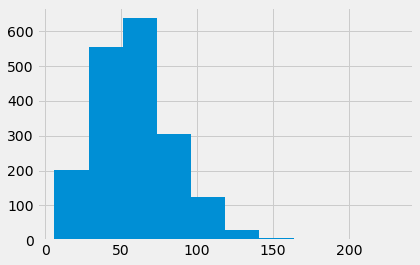

In [112]:
pd.Series(list_len).hist()

In [113]:
pd.Series(list_len).describe()

count    1862.000000
mean       59.028464
std        26.199350
min         6.000000
25%        40.000000
50%        56.000000
75%        74.000000
max       231.000000
dtype: float64

### Part 4: Prep CHTS data

In [ ]:
# Load data 
person_df = pd.read_csv(r'../Data/Chicago Travel Survey/MyDailyTravelData/person.csv')
household_df = pd.read_csv(r'../Data/Chicago Travel Survey/MyDailyTravelData/household.csv')
household_df = household_df[['sampno', 'hhinc']]
loc_df = pd.read_csv(r'../Data/Chicago Travel Survey/MyDailyTravelData/location.csv')
trip_df = pd.read_csv(r'../Data/Chicago Travel Survey/MyDailyTravelData/place.csv')

col_list = ['GIDTR', 'Tot_Population_ACS_15_19', 'LAND_AREA']
pop_df = pd.read_csv(r'../Data/census_tract_population_2021.csv', usecols=col_list, encoding='latin-1');

In [50]:
# Only keep employed sample who have a stable work location
person_df = person_df[person_df['emply_ask'] == 1]
person_df = person_df[person_df['wplace'] == 1]

In [51]:
# Age, Occupation, Industry, Income, Education Race, Gender, Population Density
per_columns = ['age','occup','indus', 'race', 'hisp', 'educ', 'sex', 'wtperfin', 'sampno', 'perno', 'wmode', 'wtrav']
person_df = person_df.filter(per_columns)

In [52]:
person_df.head()

,age,occup,indus,race,hisp,educ,sex,wtperfin,sampno,perno,wmode,wtrav
0,45,13,44-45,1,2,5,1,155.2391,20000083,1,4,5
1,33,29,54,1,2,6,2,319.6422,20000136,1,4,2
2,34,29,62,1,2,6,1,319.6422,20000136,2,1,7
8,30,41,97,1,2,5,2,68.7010,20000300,1,8,5
15,38,29,97,1,2,5,2,662.6029,20000752,2,9,3


In [53]:
# Convert separate FIPS columns into single 11 digit FIPS for each census tract
loc_df['full_fips'] = loc_df['tract_fips'] + loc_df['county_fips'] * 1000000 + loc_df['state_fips'] * 1000000000
loc_df['full_locno'] = loc_df['locno'] * 10**8 + loc_df['sampno']
trip_df['full_locno'] = trip_df['locno'] * 10**8 + trip_df['sampno']

Need to translate categorical variables from CHTS to the model inputs

In [54]:
# Education:
# 1	Not a high school graduate, grade 12 or less (this includes very young children)
# 2	High school graduate (high school diploma or GED)
# 3	Some college credit but no degree
# 4	Associate or technical school degree
# 5	Bachelor's or undergraduate degree
# 6	Graduate degree (includes professional degree like PHD, MD, DD, JD)
educ_cont_dict = {1: 10, 
                  2: 12, 
                  3: 14, 
                  4: 14, 
                  5: 16, 
                  6: 18, 
                  -9: -1, 
                  -8: -1,
                  -7: -1,
                  97: -1}
educ_cat_dict = {1: 1, 
                  2: 2, 
                  3: 3, 
                  4: 3, 
                  5: 4, 
                  6: 5, 
                  -9: -1, 
                  -8: -1,
                  -7: -1,
                  97: -1}
educ_cont_list = []
educ_cat_list = []
for person in person_df['educ'].values.tolist(): 
    educ_cont_list.append(educ_cont_dict[person])
    educ_cat_list.append(educ_cat_dict[person])
person_df['educ_cont'] = educ_cont_list
person_df['educ_cat'] = educ_cat_list

In [55]:
# Income:
# -9	Not ascertained
# -8	I don’t know
# -7	I prefer not to answer
# 1	Less than $15,000
# 2	$15,000 to $24,999
# 3	$25,000 to $29,999
# 4	$30,000 to $34,999
# 5	$35,000 to $49,999
# 6	$50,000 to $59,999
# 7	$60,000 to $74,999
# 8	$75,000 to $99,999
# 9	$100,000 to $149,999
# 10	$150,000 or more
inc_cat_dict = {1: 1,
                 2: 1,
                 3: 1,
                 4: 1,
                 5: 1, 
                 6: 2, 
                 7: 2, 
                 8: 2,
                 9: 3, 
                 10: 4, 
                 -9: -1, 
                 -8: -1, 
                 -7: -1,
                 97: -1,
                 1001: 1,
                 1002: 1,
                 1003: 1,
                 1004: 1,
                 1005: 1, 
                 1006: 1, 
                 1007: 1, 
                 1008: 1,
                 1009: 2, 
                 1010: 3, 
                 991: -1, 
                 992: -1, 
                 993: -1,
                 1097: -1}
inc_cont_dict = {1: 12.5,
                 2: 20,
                 3: 27.5,
                 4: 32.5,
                 5: 42.5, 
                 6: 55, 
                 7: 67.5, 
                 8: 87.5,
                 9: 125, 
                 10: 225, 
                 -9: -1, 
                 -8: -1, 
                 -7: -1,
                 97: -1}

# Divide household income by the number of employed people in the household 
inc_cont_list = []
inc_cat_list = []
hh_count = person_df.groupby(['sampno']).size().to_dict()
for hh in household_df.values.tolist():
    if hh[1] < 0: 
        inc_cont_list.append(inc_cont_dict[hh[1]])
        inc_cat_list.append(inc_cat_dict[hh[1]])
    elif int(hh[0]) in hh_count:
    
        if hh_count[int(hh[0])] > 1:
            inc_cont_list.append(inc_cont_dict[hh[1]]/2)
            inc_cat_list.append(inc_cat_dict[hh[1] + 1000])
        else:
            inc_cont_list.append(inc_cont_dict[hh[1]])
            inc_cat_list.append(inc_cat_dict[hh[1]])

    else:
        inc_cont_list.append(-1)
        inc_cat_list.append(-1)
household_df['income_cont'] = inc_cont_list
household_df['income_cat'] = inc_cat_list
person_df = person_df.merge(household_df[['sampno','income_cont', 'income_cat']], on='sampno')

In [56]:
# Race:
# -8	I don't know 
# -7	I prefer not to answer 
# 1	White 
# 2	African American, Black
# 3	Asian 
# 4	American Indian, Alaskan Native
# 5	Native Hawaiian or Pacific Islander
# 6	Multiracial
# 97	Some other race 
race_dict = {1: 6, 2: 1, 3: 3, 4: 4, 5: 5, 6: 7, 97: 7, -8: -1, -7: -1}
race_list = []
for person in person_df[['race', 'hisp']].values.tolist():
    if person[1] == 1:
        race_list.append(2)
    else:
        race_list.append(race_dict[person[0]])
person_df['race'] = race_list

In [57]:
# Sex: 
# -8	I don't know
# -7	I prefer not to answer
# 1	Male
# 2	Female
sex_dict = {1: 0, 2: 1, -8: -1, -7: -1}
sex_list = []
for person in person_df['sex'].values.tolist(): sex_list.append(sex_dict[person])
person_df['sex'] = sex_list

In [58]:
# Industry
# -8	I don't know
# -7	I prefer not to answer
# -1	Appropriate skip
# 11	Agriculture, Forestry, Fishing and Hunting
# 21	Mining, Quarrying, and Oil and Gas Extraction
# 22	Utilities
# 23	Construction
# 42	Wholesale Trade
# 51	Information
# 52	Finance and Insurance
# 53	Real Estate and Rental and Leasing
# 54	Professional, Scientific, and Technical Services
# 55	Management of Companies and Enterprises
# 56	Administrative and Support and Waste Management and Remediation Services
# 61	Educational Services
# 62	Health Care and Social Assistance
# 71	Arts, Entertainment, and Recreation
# 72	Accommodation and Food Services
# 81	Other Services (except Public Administration)
# 92	Public Administration
# 97	Something else
# 48-49	Transportation and Warehousing
# 31-33	Manufacturing
# 44-45	Retail Trade
ind_dict = {'11': 1,
            '21': 10,
            '22': 15,
            '23': 4,
            '42': 16,
            '51': 8,
            '52': 3,
            '53': 12,
            '54': 11,
            '55': 11,
            '56': 11,
            '61': 5,
            '62': 6,
            '71': 2,
            '72': 7,
            '81': 18,
            '92': 17,
            '97': 18,
            '48-49': 14,
            '31-33': 9,
            '44-45': 13,
            '-8': -1,
            '-7': -1,
            '-1': -1}
ind_list = []
for person in person_df['indus'].values.tolist(): ind_list.append(ind_dict[person])
person_df['indus'] = ind_list

In [59]:
# Occupation
# -8	I don't know
# -7	I prefer not to answer
# -1	Appropriate skip
# 11	Management Occupations
# 13	Business and Financial Operations Occupations
# 15	Computer and Mathematical Occupations
# 17	Architecture and Engineering Occupations
# 19	Life, Physical, and Social Science Occupations
# 21	Community and Social Service Occupations
# 23	Legal Occupations
# 25	Educational Instruction and Library Occupations
# 27	Arts, Design, Entertainment, Sports, and Media Occupations
# 29	Healthcare Practitioners and Technical Occupations
# 31	Healthcare Support Occupations
# 33	Protective Service Occupations
# 35	Food Preparation and Serving Related Occupations
# 37	Building and Grounds Cleaning and Maintenance Occupations
# 39	Personal Care and Service Occupations
# 41	Sales and Related Occupations
# 43	Office and Administrative Support Occupations
# 45	Farming, Fishing, and Forestry Occupations
# 47	Construction and Extraction Occupations
# 49	Installation, Maintenance, and Repair Occupations
# 51	Production Occupations
# 53	Transportation and Material Moving Occupations
# 55	Military Specific Occupations
# 97	None of these are a match
occ_dict = {11: 5,
            13: 5,
            15: 8,
            17: 8,
            19: 8,
            21: 10,
            23: 8,
            25: 8,
            27: 10,
            29: 8,
            31: 6,
            33: 10,
            35: 10,
            37: 10,
            39: 10,
            41: 9,
            43: 6,
            45: 3,
            47: 2,
            49: 4,
            51: 7,
            53: 11,
            55: 1,
            97: 12,
            -8: -1,
            -7: -1,
            -1: -1}
occ_list = []
for person in person_df['occup'].values.tolist(): occ_list.append(occ_dict[person])
person_df['occup'] = occ_list

In [60]:
# Need to do lookup for home location population density. 
# First, get home location tract number
home_df = loc_df[loc_df['loctype']==1]
home_df = home_df[home_df['locno']==10000]
home_df = home_df.rename(columns={'full_fips': 'home_fips'})
person_df = person_df.merge(home_df[['sampno','home_fips']], on='sampno')

# Compute density (person per sq mi)
pop_df['density'] = pop_df['Tot_Population_ACS_15_19'] / pop_df['LAND_AREA']
pop_dict = dict(zip(pop_df['GIDTR'], pop_df['density']))
pop_dict[-9009000009] = -1 # (not found)


# Urban: 3000+ person per square mile
# Suburban: 1000 - 3000 person per square mile
# Rural: less than 1000 person per square mile
t2 = 3000
t1 = 1000
living_area_list = []
for person in person_df['home_fips'].values.tolist():
    density = pop_dict[person]
    if density <= t1:
        living_area_list.append("rural")
    elif density <= t2:
        living_area_list.append("suburban")
    else:
        living_area_list.append("urban")
person_df['density'] = living_area_list

In [61]:
# Get commute distance and work census tract
work_df = loc_df[loc_df['loctype']==2]
work_df = work_df.rename(columns={'full_fips': 'work_fips'})
person_df = person_df.merge(work_df[['sampno', 'perno', 'work_fips', 'full_locno']], on=['sampno', 'perno'])
person_df = person_df.merge(trip_df[['full_locno', 'distance', 'party']], on='full_locno')

In [62]:
# Now reformat dict and remove any entries with unknown values
column_order = ['age', 'occup','indus', 'income_cont', 'income_cat', 'educ_cont', 'educ_cat',
                'race', 'sex', 'density', 'home_fips', 'work_fips', 'wmode', 'party', 'wtrav', 'distance', 'wtperfin']
person_df = person_df.reindex(columns=column_order)

person_df = person_df[~(person_df == -1).any(axis=1)]
person_df.head()

,age,occup,indus,income_cont,income_cat,educ_cont,educ_cat,race,sex,density,home_fips,work_fips,wmode,party,wtrav,distance,wtperfin
0,45,5,13,67.50,2,16,4,6,0,urban,17031802403,17031801601,4,1,5,4.977,155.2391
1,45,5,13,67.50,2,16,4,6,0,urban,17031802403,17031801601,4,1,5,3.315,155.2391
2,33,8,11,62.50,2,18,5,6,1,urban,17031081402,17031830900,4,1,2,5.426,319.6422
3,34,8,6,62.50,2,18,5,6,0,urban,17031081402,17031081401,1,1,7,0.592,319.6422
4,27,10,6,43.75,1,16,4,6,1,urban,17031241000,17031843100,4,1,4,3.556,69.2482


In [65]:
# Get the model variables for the regression and clustering models, including dummy variables
reg_input = person_df[['age', 'occup', 'indus', 'income_cont', 'educ_cont', 'race', 'sex', 'density']]
reg_input = pd.get_dummies(reg_input, drop_first=True, columns=['occup','indus','race'])
reg_input = pd.get_dummies(reg_input, drop_first=True, columns=['density'])

clus_input = person_df[['occup', 'indus', 'educ_cat', 'race', 'income_cat', 'density']]
clus_input = pd.get_dummies(clus_input, drop_first=True, columns=['occup','indus', 'educ_cat','race','income_cat','density'])

In [66]:
person_df.wtperfin.sum()

3066563.8116

In [67]:
person_df.distance.mean()

10.592882255887238

In [68]:
# Survey data does not contain any Asian respondent 
# drop race = 3
reg_input = reg_input.drop(columns=['race_3'])

In [69]:
# Create input to send to R to generate ZOIB model predictions for each response
reg_input.to_csv("chts_input.csv", index=False)

### Part 5: Compute aggregate statistics

#### 5.0 Load ZOIB results generated externally from R package

In [71]:
curr_zoib = pd.read_csv("../Results/zoib_predictions_current.csv")
pref_zoib = pd.read_csv("../Results/zoib_predictions_desired.csv")
boss_zoib = pd.read_csv("../Results/zoib_predictions_planned.csv")

#### 5.1 Generate new travel survey

In [72]:
# Use a loop to get the remote work % and third place breakdown for each person (row in model_input)
# - curr_model is for current remote work 
# - pref_model is for future remote work preferences
# - boss_model is for boss' remote work plans
# - base_model is for before COVID scenario (4.8% WFH and 95.2% in person)
# curr_model_list = []
# pref_model_list = []
# boss_model_list = []
# for ind, row in reg_input.iterrows():
#     curr_flexible_work = sum(curr_coef.values * row.values)
#     curr_model_list.append(curr_flexible_work)
    
#     pref_flexible_work = sum(pref_coef.values * row.values)
#     pref_model_list.append(pref_flexible_work)
    
#     boss_flexible_work = sum(boss_coef.values * row.values)
#     boss_model_list.append(boss_flexible_work)
    
print("average current work time percentage:", np.mean(curr_zoib))
print("average preferred work time percentage:", np.mean(pref_zoib))
print("average boss planned work time percentage:", np.mean(boss_zoib))

average current work time percentage: x    0.521158
dtype: float64
average preferred work time percentage: x    0.522126
dtype: float64
average boss planned work time percentage: x    0.459259
dtype: float64


In [73]:
person_df['curr_model'] = curr_zoib
person_df['pref_model'] = pref_zoib
person_df['boss_model'] = boss_zoib

In [153]:
curr_home_pct_list = []
curr_faf_pct_list = []
curr_cowork_pct_list = []
curr_public_pct_list = []
pref_home_pct_list = []
pref_faf_pct_list = []
pref_cowork_pct_list = []
pref_public_pct_list = []
boss_home_pct_list = []
boss_faf_pct_list = []
boss_cowork_pct_list = []
boss_public_pct_list = []
for ind, row in person_df.iterrows():
    living_area = row.density
    pct_dict = clustering_dict[living_area]
    
    curr_flexible_pct = row.curr_model
    temp_df = pd.DataFrame.from_dict(pct_dict, orient='index')[0] * curr_flexible_pct / 100
    curr_home_pct_list.append(temp_df['curr_home_pct_relative'])
    curr_faf_pct_list.append(temp_df['curr_faf_pct_relative'])
    curr_cowork_pct_list.append(temp_df['curr_cowork_pct_relative'])
    curr_public_pct_list.append(temp_df['curr_public_pct_relative'])
    
    pref_flexible_pct = row.pref_model
    temp_df = pd.DataFrame.from_dict(pct_dict, orient='index')[0] * pref_flexible_pct / 100
    pref_home_pct_list.append(temp_df['des_home_pct_relative'])
    pref_faf_pct_list.append(temp_df['des_faf_pct_relative'])
    pref_cowork_pct_list.append(temp_df['des_cowork_pct_relative'])
    pref_public_pct_list.append(temp_df['des_public_pct_relative'])
    
    boss_flexible_pct = row.boss_model
    temp_df = pd.DataFrame.from_dict(pct_dict, orient='index')[0] * boss_flexible_pct / 100
    boss_home_pct_list.append(temp_df['plan_home_pct_relative'])
    boss_faf_pct_list.append(temp_df['plan_faf_pct_relative'])
    boss_cowork_pct_list.append(temp_df['plan_cowork_pct_relative'])
    boss_public_pct_list.append(temp_df['plan_public_pct_relative'])

In [154]:
print(np.mean(curr_home_pct_list))
print(np.mean(curr_faf_pct_list))
print(np.mean(curr_cowork_pct_list))
print(np.mean(curr_public_pct_list))
print("----------------------------")
print(np.mean(pref_home_pct_list))
print(np.mean(pref_faf_pct_list))
print(np.mean(pref_cowork_pct_list))
print(np.mean(pref_public_pct_list))
print("----------------------------")
print(np.mean(boss_home_pct_list))
print(np.mean(boss_faf_pct_list))
print(np.mean(boss_cowork_pct_list))
print(np.mean(boss_public_pct_list))

nan
nan
nan
nan
----------------------------
nan
nan
nan
nan
----------------------------
nan
nan
nan
nan


In [155]:
person_df['curr_home_pct'] = curr_home_pct_list
person_df['curr_faf_pct'] = curr_faf_pct_list
person_df['curr_cowork_pct'] = curr_cowork_pct_list
person_df['curr_public_pct'] = curr_public_pct_list

person_df['pref_home_pct'] = pref_home_pct_list
person_df['pref_faf_pct'] = pref_faf_pct_list
person_df['pref_cowork_pct'] = pref_cowork_pct_list
person_df['pref_public_pct'] = pref_public_pct_list

person_df['boss_home_pct'] = boss_home_pct_list
person_df['boss_faf_pct'] = boss_faf_pct_list
person_df['boss_cowork_pct'] = boss_cowork_pct_list
person_df['boss_public_pct'] = boss_public_pct_list

In [156]:
person_df.head()

,age,occup,indus,income_cont,income_cat,educ_cont,educ_cat,race,sex,density,...,curr_cowork_pct,curr_public_pct,pref_home_pct,pref_faf_pct,pref_cowork_pct,pref_public_pct,boss_home_pct,boss_faf_pct,boss_cowork_pct,boss_public_pct
0,45,5,13,67.50,2,16,4,6,0,urban,...,0.064131,0.055777,0.326827,0.062421,0.062197,0.059570,0.299507,0.053656,0.060140,0.053494
1,45,5,13,67.50,2,16,4,6,0,urban,...,0.064131,0.055777,0.326827,0.062421,0.062197,0.059570,0.299507,0.053656,0.060140,0.053494
2,33,8,11,62.50,2,18,5,6,1,urban,...,0.071565,0.062243,0.363781,0.069479,0.069229,0.066306,0.325619,0.058334,0.065383,0.058158
3,34,8,6,62.50,2,18,5,6,0,urban,...,0.069299,0.060272,0.351054,0.067048,0.066807,0.063986,0.330468,0.059203,0.066357,0.059024
4,27,10,6,43.75,1,16,4,6,1,urban,...,0.069840,0.060743,0.359894,0.068737,0.068490,0.065597,0.315937,0.056600,0.063439,0.056429


In [161]:
def generate_new_travel_df(person_df, option, random_seed, public_choice_number, return_ind, return_dict):
    #print("start to generate new travel survey")
    # 0.952: percentage of in-person working before the COVID
    travel_list = []
    for ind, row in person_df.iterrows():
        prepend_list = row[['age', 'occup', 'indus', 'income_cont', 'income_cat', 'educ_cont',
           'educ_cat', 'race', 'sex', 'density']].values.tolist()

        home_fips = row.home_fips
        work_fips = row.work_fips
        wmode = row.wmode
        party = row.party
        wtrav = row.wtrav
        distance = row.distance

        # Current flexible work
        if option == 'current':
            unchange_work = row.wtperfin / 0.952 * (1-row.curr_model/100)
            home_work = row.wtperfin / 0.952 * (row.curr_home_pct/100)
            faf_work = row.wtperfin / 0.952 * (row.curr_faf_pct/100)
            cowork_work = row.wtperfin / 0.952 * (row.curr_cowork_pct/100)
            public_work = row.wtperfin / 0.952 * (row.curr_public_pct/100)
        elif option == 'preferred':   
            unchange_work = row.wtperfin / 0.952 * (1-row.pref_model/100)
            home_work = row.wtperfin / 0.952 * (row.pref_home_pct/100)
            faf_work = row.wtperfin / 0.952 * (row.pref_faf_pct/100)
            cowork_work = row.wtperfin / 0.952 * (row.pref_cowork_pct/100)
            public_work = row.wtperfin / 0.952 * (row.pref_public_pct/100)
        elif option == 'planned':
            unchange_work = row.wtperfin / 0.952 * (1-row.boss_model/100)
            home_work = row.wtperfin / 0.952 * (row.boss_home_pct/100)
            faf_work = row.wtperfin / 0.952 * (row.boss_faf_pct/100)
            cowork_work = row.wtperfin / 0.952 * (row.boss_cowork_pct/100)
            public_work = row.wtperfin / 0.952 * (row.boss_public_pct/100)
        else:
            print("No such option")
            raise
            
        travel_list.append(prepend_list + [home_fips, work_fips, wmode, party, wtrav, distance, unchange_work, 'unchanged'])
        
        # Friends' place
        temp_df = pd.DataFrame.from_dict(faf_dest_dict[str(home_fips)], orient='index').reset_index()
        temp_df.columns = ['work_fips', 'weight']
        temp_df_2 = pd.DataFrame.from_dict(faf_dist_dict[str(home_fips)], orient='index').reset_index()
        temp_df_2.columns = ['work_fips', 'distance']
        combined_df = pd.merge(temp_df, temp_df_2, on='work_fips')
        selected_df = combined_df[combined_df.distance <= distance]
        if selected_df.empty: # No trips within the previous travel distance
            sampled_dest, sampled_dist = combined_df.sample(n=1, replace=True, random_state=random_seed, weights='weight')[['work_fips', 'distance']].values[0]
        else: 
            sampled_dest, sampled_dist = selected_df.sample(n=1, replace=True, random_state=random_seed, weights='weight')[['work_fips', 'distance']].values[0]
        travel_list.append(prepend_list + [home_fips, sampled_dest, wmode, party, wtrav, sampled_dist, faf_work, 'friends'])

        # Co-working place
        temp_df = pd.DataFrame.from_dict(cowork_dest_dict[str(home_fips)], orient='index').reset_index()
        temp_df.columns = ['work_fips', 'weight']
        sampled_dest = temp_df.sample(n=1, replace=True, random_state=random_seed, weights='weight').work_fips.iloc[0]
        sampled_dist = cowork_dist_dict[str(home_fips)][sampled_dest]
        travel_list.append(prepend_list + [home_fips, sampled_dest, wmode, party, wtrav, sampled_dist, cowork_work, 'co-work'])

        # Public place
        temp_df = pd.DataFrame.from_dict(public_dest_dict[str(home_fips)], orient='index').reset_index()
        temp_df.columns = ['work_fips', 'weight']
        temp_df_2 = pd.DataFrame.from_dict(public_dist_dict[str(home_fips)], orient='index').reset_index()
        temp_df_2.columns = ['work_fips', 'distance']
        combined_df = pd.merge(temp_df, temp_df_2, on='work_fips')
        selected_df = combined_df[combined_df.distance <= distance].iloc[:public_choice_number]
        if selected_df.empty: # No trips within the previous travel distance
            sampled_dest, sampled_dist = combined_df.sample(n=1, replace=True, random_state=random_seed, weights='weight')[['work_fips', 'distance']].values[0]
        else: 
            sampled_dest, sampled_dist = selected_df.sample(n=1, replace=True, random_state=random_seed, weights='weight')[['work_fips', 'distance']].values[0]
        travel_list.append(prepend_list + [home_fips, sampled_dest, wmode, party, wtrav, sampled_dist, public_work, 'public'])
   
    column_list = ['age', 'occup', 'indus', 'income_cont', 'income_cat', 'educ_cont',
       'educ_cat', 'race', 'sex', 'density', 'home_fips','work_fips', 'wmode', 'party', 'wtrav', 'distance', 'wtperfin', 'type']    
    new_travel_df = pd.DataFrame(travel_list, columns = column_list)
    
    return_dict[return_ind] = new_travel_df
    
    return return_dict

In [162]:
public_choice_number = 10
seed = random.randrange(1, 1000)
return_dict = {}

return_dict = generate_new_travel_df(person_df, "current", seed, public_choice_number, 1, return_dict)

In [168]:
return_dict[1].to_csv("results_current.csv")

In [ ]:
num_processes = 30
public_choice_number = 10

seed_list = []
for i in range(num_processes):
    seed = random.randrange(1, 1000)
    seed_list.append(seed)

pool = mp.Pool(processes=num_processes)
processes = []

manager = mp.Manager()
curr_return_dict = manager.dict()

# Initiate the worker processes
for i in range(num_processes):

    # Create the process, and connect it to the worker function
    new_process = mp.Process(target=generate_new_travel_df, args=(person_df, "current", seed_list[i], public_choice_number, i, curr_return_dict))

    # Add new process to the list of processes
    processes.append(new_process)
    
    new_process.start()

for proc in processes:
    proc.join()
print("Finish current travel")

pool = mp.Pool(processes=num_processes)
processes = []

manager = mp.Manager()
pref_return_dict = manager.dict()

# Initiate the worker processes
for i in range(num_processes):

    # Create the process, and connect it to the worker function
    new_process = mp.Process(target=generate_new_travel_df, args=(person_df, "preferred", seed_list[i], public_choice_number, i, pref_return_dict))

    # Add new process to the list of processes
    processes.append(new_process)
    
    new_process.start()

for proc in processes:
    proc.join()
print("Finish preferred travel")

pool = mp.Pool(processes=num_processes)
processes = []

manager = mp.Manager()
boss_return_dict = manager.dict()

# Initiate the worker processes
for i in range(num_processes):

    # Create the process, and connect it to the worker function
    new_process = mp.Process(target=generate_new_travel_df, args=(person_df, "planned", seed_list[i], public_choice_number, i, boss_return_dict))

    # Add new process to the list of processes
    processes.append(new_process)
    
    new_process.start()

for proc in processes:
    proc.join()
print("Finish planned travel")

In [ ]:
df_list = []
for i in curr_return_dict:
    temp_df = curr_return_dict[i]
    temp_df.wtperfin = temp_df.wtperfin / num_processes
    df_list.append(temp_df)
curr_travel_df = pd.concat(df_list)

df_list = []
for i in pref_return_dict:
    temp_df = pref_return_dict[i]
    temp_df.wtperfin = temp_df.wtperfin / num_processes
    df_list.append(temp_df)
pref_travel_df = pd.concat(df_list)

df_list = []
for i in boss_return_dict:
    temp_df = boss_return_dict[i]
    temp_df.wtperfin = temp_df.wtperfin / num_processes
    df_list.append(temp_df)
boss_travel_df = pd.concat(df_list)

In [ ]:
full_wfh_curr_df = curr_return_dict[0][curr_return_dict[0].type == 'unchanged']
full_wfh_pref_df = pref_return_dict[0][pref_return_dict[0].type == 'unchanged']
full_wfh_boss_df = boss_return_dict[0][boss_return_dict[0].type == 'unchanged']

In [ ]:
# # Remove the remote work trips to get the "remote only" scenario 
# full_wfh_curr_df = curr_travel_df[curr_travel_df.type == 'unchanged']
# full_wfh_pref_df = pref_travel_df[pref_travel_df.type == 'unchanged']
# full_wfh_boss_df = boss_travel_df[boss_travel_df.type == 'unchanged']

In [ ]:
# Baseline travel data
baseline_travel_df = person_df[['age', 'occup', 'indus', 'income_cont', 'income_cat', 'educ_cont',
       'educ_cat', 'race', 'sex', 'density', 'home_fips', 'work_fips', 'wmode', 'party',
       'wtrav', 'distance', 'wtperfin']]

#### 5.2 Calculate Carbon

In [ ]:
mode_dict = {}
mode_dict[1] = 'walk'
mode_dict[2] = 'bike'
mode_dict[3] = 'motorcycle'
mode_dict[4] = 'drive'
mode_dict[5] = 'drive'
mode_dict[6] = 'carpool'
mode_dict[7] = 'school_bus'
mode_dict[8] = 'public_transit'
mode_dict[9] = 'public_transit'
mode_dict[10] = 'public_transit'
mode_dict[11] = 'TNC'
mode_dict[12] = 'TNC'
mode_dict[13] = 'public_transit'
mode_dict[14] = 'public_transit'
mode_dict[15] = 'TNC'
mode_dict[16] = 'TNC'
mode_dict[17] = 'other'
mode_dict[18] = 'other'
mode_dict[97] = 'other'

In [ ]:
# Function to calculate carbon emission based on each travel dataframe
# Carbon Emission for each mode
# Bike, Walk: 0 pound CO2 per mile
# Car: 0.96 pound CO2 per mile / party size
# Public Transit: 0.45 pound CO2 per mile
# Carpool: 0.96 pound CO2 per mile / party size
# TNC_alone: 0.96 pound CO2 per mile
# Taxi: 0.96 pound CO2 per mile
# TNC_share: 0.96 pound CO2 per mile / party size
def calculate_carbon(travel_df):
    
    curr_carbon_list = []
    for ind, row in travel_df.iterrows():
        curr_mode = mode_dict[row['wmode']]
        party_size = row.party
        dist = row.distance
        weight = row.wtperfin
        work_days = max(row.wtrav, 0)

        if curr_mode in ['walk', 'bike']:
            curr_carbon = 0
        elif curr_mode in ['carpool']:
            curr_carbon = 0.96 * dist / party_size
        elif curr_mode in ['drive', 'TNC', 'Taxi', 'motorcycle']:
            curr_carbon = 0.96 * dist / party_size
        elif curr_mode in ['public_transit', 'school_bus']:
            curr_carbon = 0.45 * dist
        elif curr_mode == 'other':
            curr_carbon = 0
        else:
            print("No such mode", curr_mode)

        curr_carbon_list.append(curr_carbon * work_days * 52 * 0.00045359237)
    travel_df['carbon(MT)'] = curr_carbon_list

    # Pounds CO2 to Metric Tone
    total_Carbon_Emission = sum(travel_df['carbon(MT)'] * travel_df.wtperfin)
    print("Overall annual carbon emission due to commute travel:", total_Carbon_Emission)
    
    return travel_df

In [ ]:
carbon_baseline_travel_df = calculate_carbon(baseline_travel_df)
carbon_curr_travel_df = calculate_carbon(curr_travel_df)
carbon_pref_travel_df = calculate_carbon(pref_travel_df)
carbon_boss_travel_df = calculate_carbon(boss_travel_df)

In [ ]:
carbon_full_wfh_curr_df = calculate_carbon(full_wfh_curr_df)
carbon_full_wfh_pref_df = calculate_carbon(full_wfh_pref_df)
carbon_full_wfh_boss_df = calculate_carbon(full_wfh_boss_df)

#### 5.3 Generate OD Map

In [ ]:
# Function to generate weekly od demand in a list format. 
# Mode and travel distance are also included.
def generate_od_demand(travel_df):
    temp_df = travel_df[['home_fips', 'work_fips', 'wmode', 'distance', 'wtrav', 'wtperfin']]
    temp_df['weekly_demand'] = temp_df.wtrav * temp_df.wtperfin
    wmode_list = temp_df.wmode.tolist()
    mode_list = []
    for wmode in wmode_list:
        mode = mode_dict[wmode]
        mode_list.append(mode)
    temp_df['mode'] = mode_list
    return temp_df[['home_fips', 'work_fips', 'mode', 'distance', 'weekly_demand']]

In [ ]:
baseline_od_df = generate_od_demand(baseline_travel_df)
curr_od_df = generate_od_demand(curr_travel_df)
pref_od_df = generate_od_demand(pref_travel_df)
boss_od_df = generate_od_demand(boss_travel_df)
full_wfh_curr_od_df = generate_od_demand(full_wfh_curr_df)
full_wfh_pref_od_df = generate_od_demand(full_wfh_pref_df)
full_wfh_boss_od_df = generate_od_demand(full_wfh_boss_df)

In [ ]:
curr_od_combined_df = curr_od_df.groupby(by=['home_fips', 'work_fips', 'mode', 'distance'], as_index=False).sum()
pref_od_combined_df = pref_od_df.groupby(by=['home_fips', 'work_fips', 'mode', 'distance'], as_index=False).sum()
boss_od_combined_df = boss_od_df.groupby(by=['home_fips', 'work_fips', 'mode', 'distance'], as_index=False).sum()

In [ ]:
baseline_od_df.to_csv("OD_results/baseline_od.csv", index=None)

In [ ]:
curr_od_combined_df.to_csv("OD_results/current_od.csv", index=None)
pref_od_combined_df.to_csv("OD_results/preferred_od.csv", index=None)
boss_od_combined_df.to_csv("OD_results/planned_od.csv", index=None)

In [ ]:
full_wfh_curr_od_df.to_csv("OD_results/current_od_wfh.csv", index=None)
full_wfh_pref_od_df.to_csv("OD_results/preferred_od_wfh.csv", index=None)
full_wfh_boss_od_df.to_csv("OD_results/planned_od_wfh.csv", index=None)

# _OLD

In [704]:
# Combine commuting distance ('distance') and commuting mode ('wmode') with # of work travel days ('wtrav' x 52) in 'person_df' 
# to get the total commuting distance by mode for the baseline scenario (note results should be multiplied by the 'wtperfin' 
# column to get the regional total).

In [718]:
# Current work travel 
# 0.952: percentage of in-person working before the COVID
curr_travel_list = []
for ind, row in person_df.iterrows():
    prepend_list = row[['age', 'occup', 'indus', 'income_cont', 'income_cat', 'educ_cont',
       'educ_cat', 'race', 'sex', 'density']].values.tolist()

    home_fips = row.home_fips
    work_fips = row.work_fips
    wmode = row.wmode
    party = row.party
    wtrav = row.wtrav
    distance = row.distance
    
    # Current flexible work
    unchange_work = row.wtperfin / 0.952 * (1-row.curr_model/100)
    curr_travel_list.append(prepend_list + [home_fips, work_fips, wmode, party, wtrav, distance, unchange_work, 'unchanged'])
    
    home_work = row.wtperfin / 0.952 * (row.curr_home_pct/100)

    faf_work = row.wtperfin / 0.952 * (row.curr_faf_pct/100)
    temp_df = pd.DataFrame.from_dict(faf_dest_dict[str(home_fips)], orient='index').reset_index()
    temp_df.columns = ['work_fips', 'weight']
    temp_df_2 = pd.DataFrame.from_dict(faf_dist_dict[str(home_fips)], orient='index').reset_index()
    temp_df_2.columns = ['work_fips', 'distance']
    combined_df = pd.merge(temp_df, temp_df_2, on='work_fips')
    selected_df = combined_df[combined_df.distance <= distance]
    if selected_df.empty: # No trips within the previous travel distance
        sampled_dest, sampled_dist = combined_df.sample(n=1, replace=True, random_state=1, weights='weight')[['work_fips', 'distance']].values[0]
    else: 
        sampled_dest, sampled_dist = selected_df.sample(n=1, replace=True, random_state=1, weights='weight')[['work_fips', 'distance']].values[0]
    curr_travel_list.append(prepend_list + [home_fips, sampled_dest, wmode, party, wtrav, sampled_dist, faf_work, 'friends'])
    
    cowork_work = row.wtperfin / 0.952 * (row.curr_cowork_pct/100)
    temp_df = pd.DataFrame.from_dict(cowork_dest_dict[str(home_fips)], orient='index').reset_index()
    temp_df.columns = ['work_fips', 'weight']
    sampled_dest = temp_df.sample(n=1, replace=True, random_state=1, weights='weight').work_fips.iloc[0]
    sampled_dist = cowork_dist_dict[str(home_fips)][sampled_dest]
    curr_travel_list.append(prepend_list + [home_fips, sampled_dest, wmode, party, wtrav, sampled_dist, cowork_work, 'co-work'])
    
    public_work = row.wtperfin / 0.952 * (row.curr_public_pct/100)
    temp_df = pd.DataFrame.from_dict(public_dest_dict[str(home_fips)], orient='index').reset_index()
    temp_df.columns = ['work_fips', 'weight']
    temp_df_2 = pd.DataFrame.from_dict(public_dist_dict[str(home_fips)], orient='index').reset_index()
    temp_df_2.columns = ['work_fips', 'distance']
    combined_df = pd.merge(temp_df, temp_df_2, on='work_fips')
    selected_df = combined_df[combined_df.distance <= distance]
    if selected_df.empty: # No trips within the previous travel distance
        sampled_dest, sampled_dist = combined_df.sample(n=1, replace=True, random_state=1, weights='weight')[['work_fips', 'distance']].values[0]
    else: 
        sampled_dest, sampled_dist = selected_df.sample(n=1, replace=True, random_state=1, weights='weight')[['work_fips', 'distance']].values[0]
    curr_travel_list.append(prepend_list + [home_fips, sampled_dest, wmode, party, wtrav, sampled_dist, public_work, 'public'])

In [719]:
# Preferred work travel 
# 0.952: percentage of in-person working before the COVID
pref_travel_list = []
for ind, row in person_df.iterrows():
    prepend_list = row[['age', 'occup', 'indus', 'income_cont', 'income_cat', 'educ_cont',
       'educ_cat', 'race', 'sex', 'density']].values.tolist()

    home_fips = row.home_fips
    work_fips = row.work_fips
    wmode = row.wmode
    party = row.party
    wtrav = row.wtrav
    distance = row.distance
    
    # Preferred flexible work
    unchange_work = row.wtperfin / 0.952 * (1-row.pref_model/100)
    pref_travel_list.append(prepend_list + [home_fips, work_fips, wmode, party, wtrav, distance, unchange_work, 'unchanged'])
    
    home_work = row.wtperfin / 0.952 * (row.pref_home_pct/100)

    faf_work = row.wtperfin / 0.952 * (row.pref_faf_pct/100)
    temp_df = pd.DataFrame.from_dict(faf_dest_dict[str(home_fips)], orient='index').reset_index()
    temp_df.columns = ['work_fips', 'weight']
    temp_df_2 = pd.DataFrame.from_dict(faf_dist_dict[str(home_fips)], orient='index').reset_index()
    temp_df_2.columns = ['work_fips', 'distance']
    combined_df = pd.merge(temp_df, temp_df_2, on='work_fips')
    selected_df = combined_df[combined_df.distance <= distance]
    if selected_df.empty: # No trips within the previous travel distance
        sampled_dest, sampled_dist = combined_df.sample(n=1, replace=True, random_state=1, weights='weight')[['work_fips', 'distance']].values[0]
    else: 
        sampled_dest, sampled_dist = selected_df.sample(n=1, replace=True, random_state=1, weights='weight')[['work_fips', 'distance']].values[0]
    pref_travel_list.append(prepend_list + [home_fips, sampled_dest, wmode, party, wtrav, sampled_dist, faf_work, 'friends'])
    
    cowork_work = row.wtperfin / 0.952 * (row.pref_cowork_pct/100)
    temp_df = pd.DataFrame.from_dict(cowork_dest_dict[str(home_fips)], orient='index').reset_index()
    temp_df.columns = ['work_fips', 'weight']
    sampled_dest = temp_df.sample(n=1, replace=True, random_state=2, weights='weight').work_fips.iloc[0]
    sampled_dist = cowork_dist_dict[str(home_fips)][sampled_dest]
    pref_travel_list.append(prepend_list + [home_fips, sampled_dest, wmode, party, wtrav, sampled_dist, cowork_work, 'co-work'])
    
    public_work = row.wtperfin / 0.952 * (row.pref_public_pct/100)
    temp_df = pd.DataFrame.from_dict(public_dest_dict[str(home_fips)], orient='index').reset_index()
    temp_df.columns = ['work_fips', 'weight']
    temp_df_2 = pd.DataFrame.from_dict(public_dist_dict[str(home_fips)], orient='index').reset_index()
    temp_df_2.columns = ['work_fips', 'distance']
    combined_df = pd.merge(temp_df, temp_df_2, on='work_fips')
    selected_df = combined_df[combined_df.distance <= distance]
    if selected_df.empty: # No trips within the previous travel distance
        sampled_dest, sampled_dist = combined_df.sample(n=1, replace=True, random_state=1, weights='weight')[['work_fips', 'distance']].values[0]
    else: 
        sampled_dest, sampled_dist = selected_df.sample(n=1, replace=True, random_state=1, weights='weight')[['work_fips', 'distance']].values[0]
    pref_travel_list.append(prepend_list + [home_fips, sampled_dest, wmode, party, wtrav, sampled_dist, public_work, 'public'])

In [720]:
# Boss planned work travel 
# 0.952: percentage of in-person working before the COVID
boss_travel_list = []
for ind, row in person_df.iterrows():
    prepend_list = row[['age', 'occup', 'indus', 'income_cont', 'income_cat', 'educ_cont',
       'educ_cat', 'race', 'sex', 'density']].values.tolist()

    home_fips = row.home_fips
    work_fips = row.work_fips
    wmode = row.wmode
    party = row.party
    wtrav = row.wtrav
    distance = row.distance
    
    # Boss planned flexible work
    unchange_work = row.wtperfin / 0.952 * (1-row.boss_model/100)
    boss_travel_list.append(prepend_list + [home_fips, work_fips, wmode, party, wtrav, distance, unchange_work, 'unchanged'])
    
    home_work = row.wtperfin / 0.952 * (row.boss_home_pct/100)

    faf_work = row.wtperfin / 0.952 * (row.boss_faf_pct/100)
    temp_df = pd.DataFrame.from_dict(faf_dest_dict[str(home_fips)], orient='index').reset_index()
    temp_df.columns = ['work_fips', 'weight']
    temp_df_2 = pd.DataFrame.from_dict(faf_dist_dict[str(home_fips)], orient='index').reset_index()
    temp_df_2.columns = ['work_fips', 'distance']
    combined_df = pd.merge(temp_df, temp_df_2, on='work_fips')
    selected_df = combined_df[combined_df.distance <= distance]
    if selected_df.empty: # No trips within the previous travel distance
        sampled_dest, sampled_dist = combined_df.sample(n=1, replace=True, random_state=1, weights='weight')[['work_fips', 'distance']].values[0]
    else: 
        sampled_dest, sampled_dist = selected_df.sample(n=1, replace=True, random_state=1, weights='weight')[['work_fips', 'distance']].values[0]
    boss_travel_list.append(prepend_list + [home_fips, sampled_dest, wmode, party, wtrav, sampled_dist, faf_work, 'friends'])
    
    cowork_work = row.wtperfin / 0.952 * (row.boss_cowork_pct/100)
    temp_df = pd.DataFrame.from_dict(cowork_dest_dict[str(home_fips)], orient='index').reset_index()
    temp_df.columns = ['work_fips', 'weight']
    sampled_dest = temp_df.sample(n=1, replace=True, random_state=3, weights='weight').work_fips.iloc[0]
    sampled_dist = cowork_dist_dict[str(home_fips)][sampled_dest]
    boss_travel_list.append(prepend_list + [home_fips, sampled_dest, wmode, party, wtrav, sampled_dist, cowork_work, 'co-work'])
    
    public_work = row.wtperfin / 0.952 * (row.boss_public_pct/100)
    temp_df = pd.DataFrame.from_dict(public_dest_dict[str(home_fips)], orient='index').reset_index()
    temp_df.columns = ['work_fips', 'weight']
    temp_df_2 = pd.DataFrame.from_dict(public_dist_dict[str(home_fips)], orient='index').reset_index()
    temp_df_2.columns = ['work_fips', 'distance']
    combined_df = pd.merge(temp_df, temp_df_2, on='work_fips')
    selected_df = combined_df[combined_df.distance <= distance]
    if selected_df.empty: # No trips within the previous travel distance
        sampled_dest, sampled_dist = combined_df.sample(n=1, replace=True, random_state=1, weights='weight')[['work_fips', 'distance']].values[0]
    else: 
        sampled_dest, sampled_dist = selected_df.sample(n=1, replace=True, random_state=1, weights='weight')[['work_fips', 'distance']].values[0]
    boss_travel_list.append(prepend_list + [home_fips, sampled_dest, wmode, party, wtrav, sampled_dist, public_work, 'public'])

In [721]:
column_list = ['age', 'occup', 'indus', 'income_cont', 'income_cat', 'educ_cont',
       'educ_cat', 'race', 'sex', 'density', 'home_fips','work_fips', 'wmode', 'party', 'wtrav', 'distance', 'wtperfin', 'type']

In [722]:
curr_travel_df = pd.DataFrame(curr_travel_list, columns = column_list)
pref_travel_df = pd.DataFrame(pref_travel_list, columns = column_list)
boss_travel_df = pd.DataFrame(boss_travel_list, columns = column_list)

In [904]:
aset = (1,2,3,4,5,6,7,8)

In [911]:
pd.Series(aset).sample(n=4, random_state=2022).values

array([3, 7, 4, 2])